In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from imputation import find_baths, find_bedrooms, find_beds, data_imputation
sns.set(rc={'figure.figsize':(11,8)})

In [2]:
#!pip install plotly
#!pip install shapely

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib
import warnings
import plotly.express as px
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
warnings.filterwarnings("ignore")

In [7]:
model_data=data_imputation()

In [5]:
model_data.head()

,id,name,description,neighborhood_overview,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_years,Success_rate,days_booked,booking_status,min_price,max_price,mean_price,host_in_sfo,licensed
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",Please check local laws re Covid before you re...,Quiet cul de sac in friendly neighborhood<br /...,1169,2008-07-31,"San Francisco, California, United States",We are a family of four that live upstairs. W...,0,100,98,t,Duboce Triangle,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"San Francisco, California, United States",Western Addition,37.77028,-122.43317,Entire serviced apartment,Entire home/apt,3,1 bath,1.0,2.0,"[""Wifi"", ""Hot water"", ""Dedicated workspace"", ""...",$172.00,2,30,2.0,2.0,1125.0,1125.0,2.0,1125.0,t,10,17,22,136,315,42,0,2009-07-23,2021-12-06,4.87,4.94,4.95,4.95,4.90,4.98,4.78,City Registration Pending,f,1,1,0,0,2.08,13.4,0.71303,229,3,170.0,192.0,172.2,1.0,0.0
1,5858,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,8904,2009-03-02,"San Diego County, California, United States",Philip: English transplant to the Bay Area and...,2,100,71,f,Bernal Heights,2.0,2.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,"San Francisco, California, United States",Bernal Heights,37.74474,-122.42089,Entire rental unit,Entire home/apt,5,1 bath,2.0,3.0,"[""First aid kit"", ""Fire extinguisher"", ""Long t...",$235.00,30,60,30.0,30.0,60.0,60.0,30.0,60.0,t,30,60,90,365,111,0,0,2009-05-03,2017-08-06,4.88,4.85,4.87,4.89,4.85,4.77,4.68,NaN,f,1,1,0,0,0.72,12.9,0.00000,0,0,235.0,235.0,235.0,0.0,0.0
2,7918,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",21994,2009-06-17,"San Francisco, California, United States",7 minutes walk to UCSF hospital & school campu...,0,100,100,f,Cole Valley,10.0,10.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"San Francisco, California, United States",Haight Ashbury,37.76555,-122.45213,Private room in rental unit,Private room,2,4 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Lock on bedroom door"", ...",$56.00,32,60,32.0,32.0,60.0,60.0,32.0,60.0,t,30,60,90,365,19,0,0,2009-08-31,2020-03-06,4.20,3.73,3.87,4.67,4.60,4.73,4.00,NaN,f,9,0,9,0,0.13,12.6,0.00000,0,0,56.0,65.0,62.1,1.0,0.0
3,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,NaN,21994,2009-06-17,"San Francisco, California, United States",7 minutes walk to UCSF hospital & school campu...,0,100,100,f,Cole Valley,10.0,10.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,NaN,Haight Ashbury,37.76555,-122.45213,Private room in rental unit,Private room,2,4 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Lock on bedroom door"", ...",$56.00,32,90,32.0,32.0,90.0,90.0,32.0,90.0,t,30,60,90,365,8,0,0,2014-09-08,2018-09-12,4.63,4.3

Text(0.5, 1.0, 'Airbnb booking status(in percentage)')

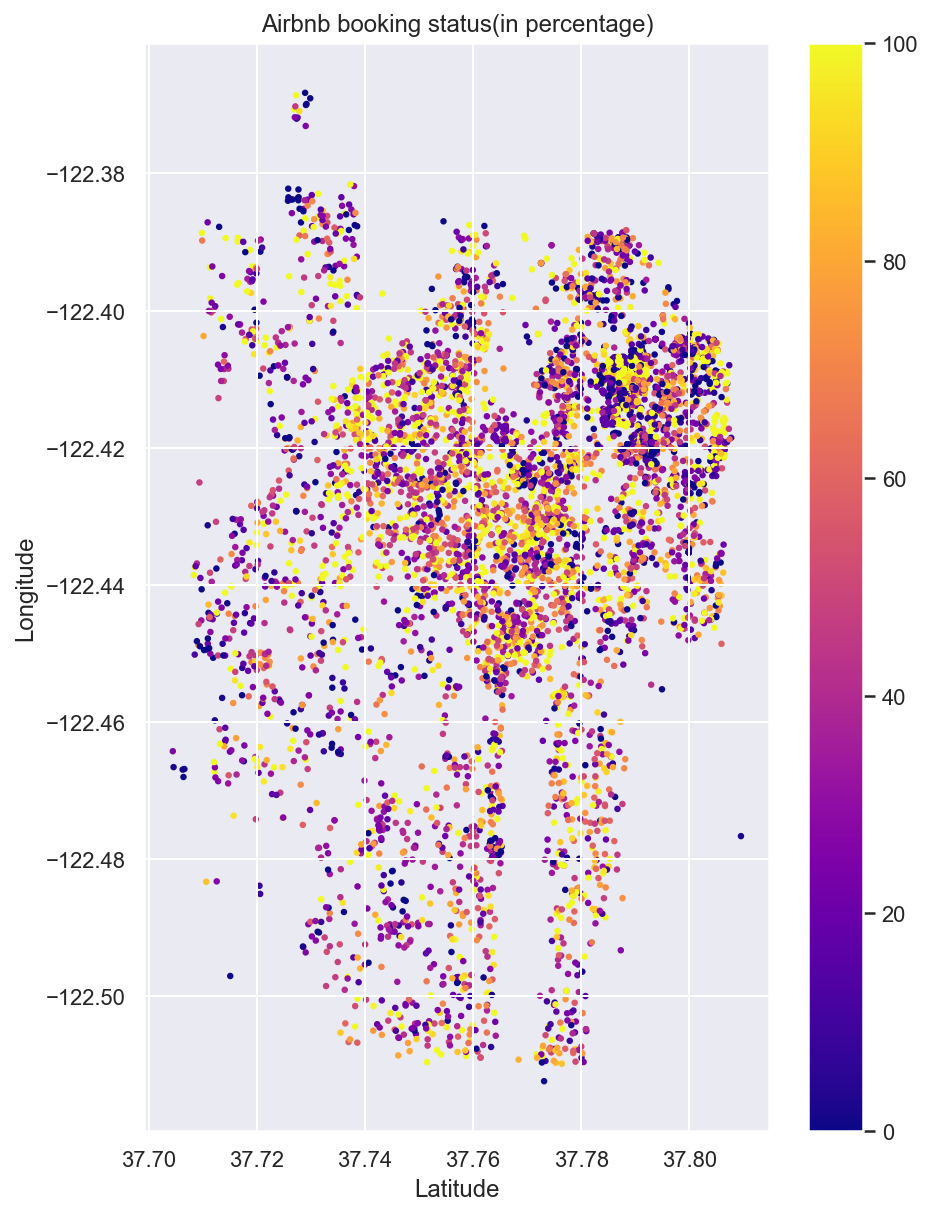

In [8]:
fig,ax=plt.subplots(figsize=[7,10])
matplotlib.rcParams.update({'font.size':15})
plt.scatter(model_data['latitude'],model_data['longitude'],
           c=model_data['Success_rate']*100,s=5,cmap='plasma',zorder=0.1)
plt.colorbar()
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Airbnb booking status(in percentage)')

In [9]:
model_data['Success_rate']=round(model_data['Success_rate']*100,2)

In [10]:
data=pd.read_csv('model_data.csv')
data.head()

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable,reviews_per_month,wifi,smoke_alarm,essentials,carbon_monoxide_alarm,heating,hangers,hair_dryer,long_term_stays_allowed,iron,kitchen,shampoo,hot_water,dedicated_workspace,fire_extinguisher,washer,dryer,coffee_maker,microwave,refrigerator,dishes_and_silverware,bed_linens,cooking_basics,tv,first_aid_kit,private_entrance,free_street_parking,oven,stove,extra_pillows_and_blankets,dishwasher,luggage_dropoff_allowed,bathtub,security_cameras_on_property,lockbox,lock_on_bedroom_door,backyard,free_parking_on_premises,elevator,keypad,shower_gel,room-darkening_shades,freezer,air_conditioning,patio_or_balcony,body_soap,dining_table,cleaning_products,hot_water_kettle,conditioner,toaster,wine_glasses,indoor_fireplace,bbq_grill,paid_parking_off_premises,gym,baking_sheet,outdoor_furniture,laundromat_nearby,pack_\u2019n_play/travel_crib,portable_fans,ethernet_connection,host_greets_you,breakfast,paid_parking_on_premises,outdoor_dining_area,single_level_home,building_staff,smart_lock,private_patio_or_balcony,mini_fridge,clothing_storage,children\u2019s_books_and_toys,central_heating,cleaning_before_checkout,clothing_storage:_closet,barbecue_utensils,crib,hot_tub,shared_patio_or_balcony,board_games,high_chair,rice_maker,private_fenced_garden_or_backyard,drying_rack_for_clothing,shared_fenced_garden_or_backyard,bathroom_essentials,bedroom_comforts,pour-over_coffee,ceiling_fan,keurig_coffee_machine,children\u2019s_dinnerware,fire_pit,free_dryer_\u2013_in_unit,pool,paid_parking_garage_off_premises,safe,free_washer_\u2013_in_unit,babysitter_recommendations,portable_heater,outlet_covers,mean_price,Success_rate,host_in_sfo,licensed
0,0,100,t,1.0,t,t,Western Addition,Entire serviced apartment,Entire home/apt,3,1 bath,1.0,2.0,2,30,2.0,2.0,1125.0,1125.0,2.0,1125.0,t,315,42,0,4.87,4.95,4.95,4.90,4.98,f,2.08,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,172.2,0.71303,1.0,0.0
1,2,100,f,2.0,t,t,Bernal Heights,Entire rental unit,Entire home/apt,5,1 bath,2.0,3.0,30,60,30.0,30.0,60.0,60.0,30.0,60.0,t,111,0,0,4.88,4.87,4.89,4.85,4.77,f,0.72,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,235.0,0.00000,0.0,0.0
2,0,100,f,10.0,t,t,Haight Ashbury,Private room in rental unit,Private room,2,4 shared baths,1.0,1.0,32,60,32.0,32.0,60.0,60.0,32.0,60.0,t,19,0,0,4.20,3.87,4.67,4.60,4.73,f,0.13,1,1,0,1,1,1,0,1,0,1,0,1,0,1,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,62.1,0.00000,1.0,0.0
3,0,100,f,10.0,t,t,Haight Ashbury,Private room in rental unit,Private room,2,4 shared baths,1.0,1.0,32,90,32.0,32.0,90.0,90.0,32.0,90.0,t,8,0,0,4.63,4.38,4.75,4.75,4.63,f,0.09,1,1,0,1,1,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,62.1,0.00000,1.0,0.0
4,0,94,f,2.0,t,t,Western Addition,Entire condominium (condo),Entire home/apt,4,1.5 baths,2.0,2.0,7,111,7.0,7.0,111.0,111.0,7.0,111.0,t,28,0,0,4.87,5.00,4.94,5.00,4.94,f,0.19,1,1,1,1,1,1,1,1

In [11]:
for i in data.index:
    if data.loc[i,'Success_rate']>0.50:
        data.loc[i,'Successful']=1
    else:
        data.loc[i,'Successful']=0

In [12]:
for i in data.index:
    if data.loc[i,'Success_rate']==1:
        data.loc[i,'Booking_level']='0% availability/Fully booked'
    elif data.loc[i,'Success_rate']>0.75:
        data.loc[i,'Booking_level']='Availability -less than 25%'
    elif data.loc[i,'Success_rate']>0.5:
        data.loc[i,'Booking_level']='Availability -25% to 50%' 
    elif data.loc[i,'Success_rate']>0.25:
        data.loc[i,'Booking_level']='Availability -50% to 75%' 
    elif data.loc[i,'Success_rate']>0:
        data.loc[i,'Booking_level']='Availability -75% or more' 
    elif data.loc[i,'Success_rate']==0:
        data.loc[i,'Booking_level']='No booking yet' 

In [43]:
pd.set_option('display.max_rows',None)
data.dtypes

host_response_time                     int64
host_response_rate                     int64
host_is_superhost                     object
host_total_listings_count            float64
host_has_profile_pic                  object
host_identity_verified                object
neighbourhood_cleansed                object
property_type                         object
room_type                             object
accommodates                           int64
bathrooms_text                        object
bedrooms                             float64
beds                                 float64
minimum_nights                         int64
maximum_nights                         int64
minimum_minimum_nights               float64
maximum_minimum_nights               float64
minimum_maximum_nights               float64
maximum_maximum_nights               float64
minimum_nights_avg_ntm               float64
maximum_nights_avg_ntm               float64
has_availability                      object
number_of_

In [13]:
pd.set_option('display.max_columns',None)
data.describe()

,host_response_time,host_response_rate,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,wifi,smoke_alarm,essentials,carbon_monoxide_alarm,heating,hangers,hair_dryer,long_term_stays_allowed,iron,kitchen,shampoo,hot_water,dedicated_workspace,fire_extinguisher,washer,dryer,coffee_maker,microwave,refrigerator,dishes_and_silverware,bed_linens,cooking_basics,tv,first_aid_kit,private_entrance,free_street_parking,oven,stove,extra_pillows_and_blankets,dishwasher,luggage_dropoff_allowed,bathtub,security_cameras_on_property,lockbox,lock_on_bedroom_door,backyard,free_parking_on_premises,elevator,keypad,shower_gel,room-darkening_shades,freezer,air_conditioning,patio_or_balcony,body_soap,dining_table,cleaning_products,hot_water_kettle,conditioner,toaster,wine_glasses,indoor_fireplace,bbq_grill,paid_parking_off_premises,gym,baking_sheet,outdoor_furniture,laundromat_nearby,pack_\u2019n_play/travel_crib,portable_fans,ethernet_connection,host_greets_you,breakfast,paid_parking_on_premises,outdoor_dining_area,single_level_home,building_staff,smart_lock,private_patio_or_balcony,mini_fridge,clothing_storage,children\u2019s_books_and_toys,central_heating,cleaning_before_checkout,clothing_storage:_closet,barbecue_utensils,crib,hot_tub,shared_patio_or_balcony,board_games,high_chair,rice_maker,private_fenced_garden_or_backyard,drying_rack_for_clothing,shared_fenced_garden_or_backyard,bathroom_essentials,bedroom_comforts,pour-over_coffee,ceiling_fan,keurig_coffee_machine,children\u2019s_dinnerware,fire_pit,free_dryer_\u2013_in_unit,pool,paid_parking_garage_off_premises,safe,free_washer_\u2013_in_unit,babysitter_recommendations,portable_heater,outlet_covers,mean_price,Success_rate,host_in_sfo,licensed,Successful
count,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.00000,6411.000000,6411.000000,6411.000000,6.411000e+03,6411.000000,6.411000e+03,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.00000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000
mean,0.457963,94.588364,89.785837,3.087506,1.443145,1.768211,23.920293,497.44954,25.341912,42.649197,692.970519,7.370007e+06,41.943893,7.346902e+06,45.564343,7.481516,0.622992,3.776763,3.778028,3.870259,3.852992,3.811774,1.022043,0.981282,0.953361,0.922633,0.867883,0.867571,0.861956,0.849321,0.815317,0.814070,0.763531,0.754017,0.729371,0.703322,0.673530,0.633754,0.6190

In [14]:
pivot_table=pd.pivot_table(data,index='Booking_level',columns='licensed',values='Success_rate',aggfunc=len,margins=True)
pivot_table=pivot_table.iloc[:,:-1].div(pivot_table.iloc[:,-1],axis=0)*100
pivot_table=pivot_table.iloc[:-1,:]
pivot_table

licensed,0.0,1.0
Booking_level,,
0% availability/Fully booked,65.726872,34.273128
Availability -25% to 50%,71.398305,28.601695
Availability -50% to 75%,66.984993,33.015007
Availability -75% or more,76.762038,23.237962
Availability -less than 25%,73.447947,26.552053
No booking yet,88.601036,11.398964


<Figure size 576x432 with 0 Axes>

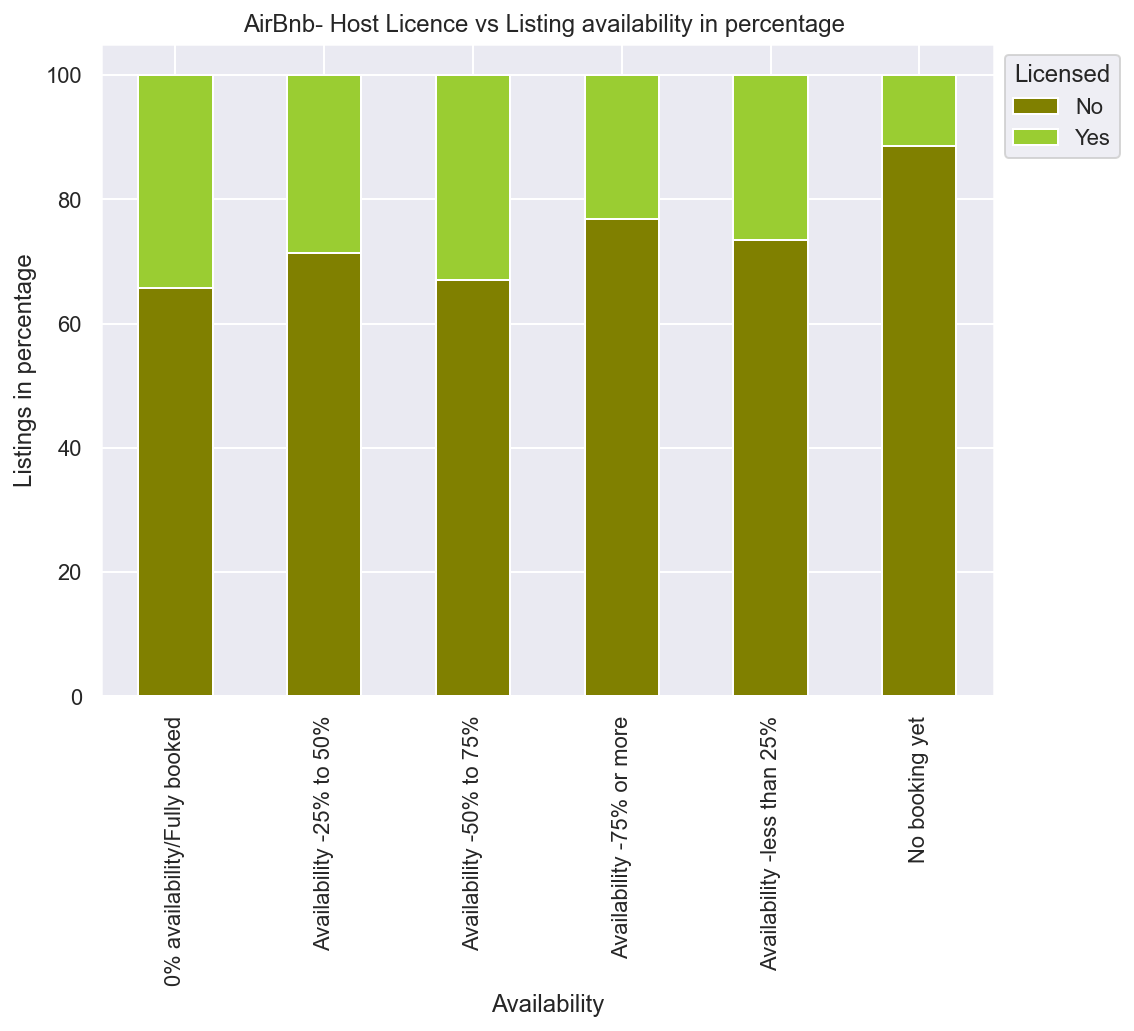

In [15]:
pivot_table=pd.pivot_table(data,index='Booking_level',columns='licensed',values='Success_rate',aggfunc=len,margins=True)
pivot_table=pivot_table.iloc[:,:-1].div(pivot_table.iloc[:,-1],axis=0)*100
pivot_table=pivot_table.iloc[:-1,:]
colors=['olive','yellowgreen']
sns.set(rc={'figure.figsize':(8,6)})
fig=plt.figure()
ax=pivot_table.plot.bar(stacked=True,color = colors)
ax.legend(loc='best',bbox_to_anchor=(1,1),ncol=1,labels=['No','Yes'],title='Licensed')
ax.set_title("AirBnb- Host Licence vs Listing availability in percentage ")
ax.set_xlabel('Availability')
ax.set_ylabel('Listings in percentage')
plt.show()

licensed                       0.0  1.0
Booking_level                          
0% availability/Fully booked   746  389
Availability -25% to 50%       674  270
Availability -50% to 75%       982  484
Availability -75% or more     1100  333
Availability -less than 25%    769  278
No booking yet                 342   44


<Figure size 576x432 with 0 Axes>

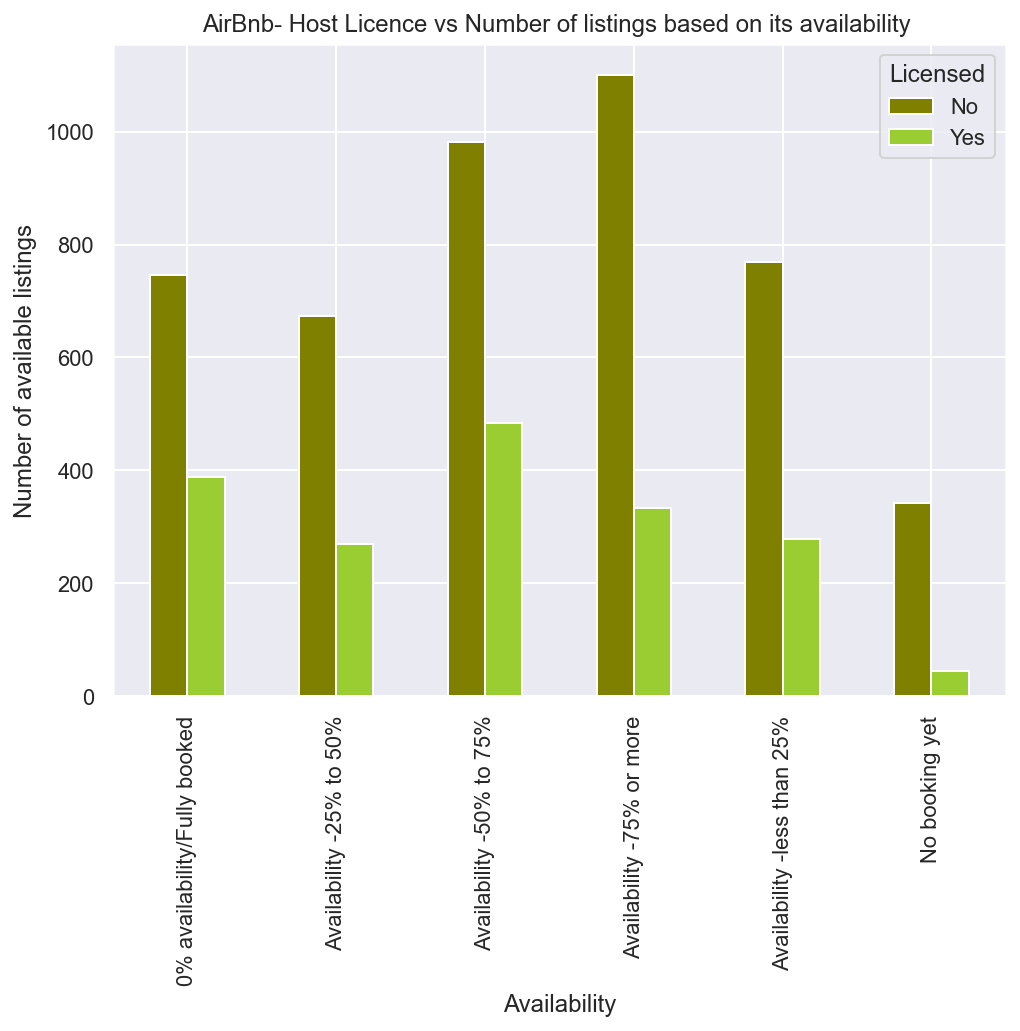

In [16]:
pivot_table=pd.pivot_table(data,index='Booking_level',columns='licensed',values='Success_rate',aggfunc='count')
print(pivot_table)
fig=plt.figure()
ax=pivot_table.plot.bar(stacked=False,color = colors)
ax.legend(loc='upper right',bbox_to_anchor=(1,1),ncol=1,labels=['No','Yes'],title='Licensed')
ax.set_title("AirBnb- Host Licence vs Number of listings based on its availability ")
ax.set_xlabel('Availability')
ax.set_ylabel('Number of available listings')
plt.show()

Text(0, 0.5, 'Number of Listings in percentage')

<Figure size 720x576 with 0 Axes>

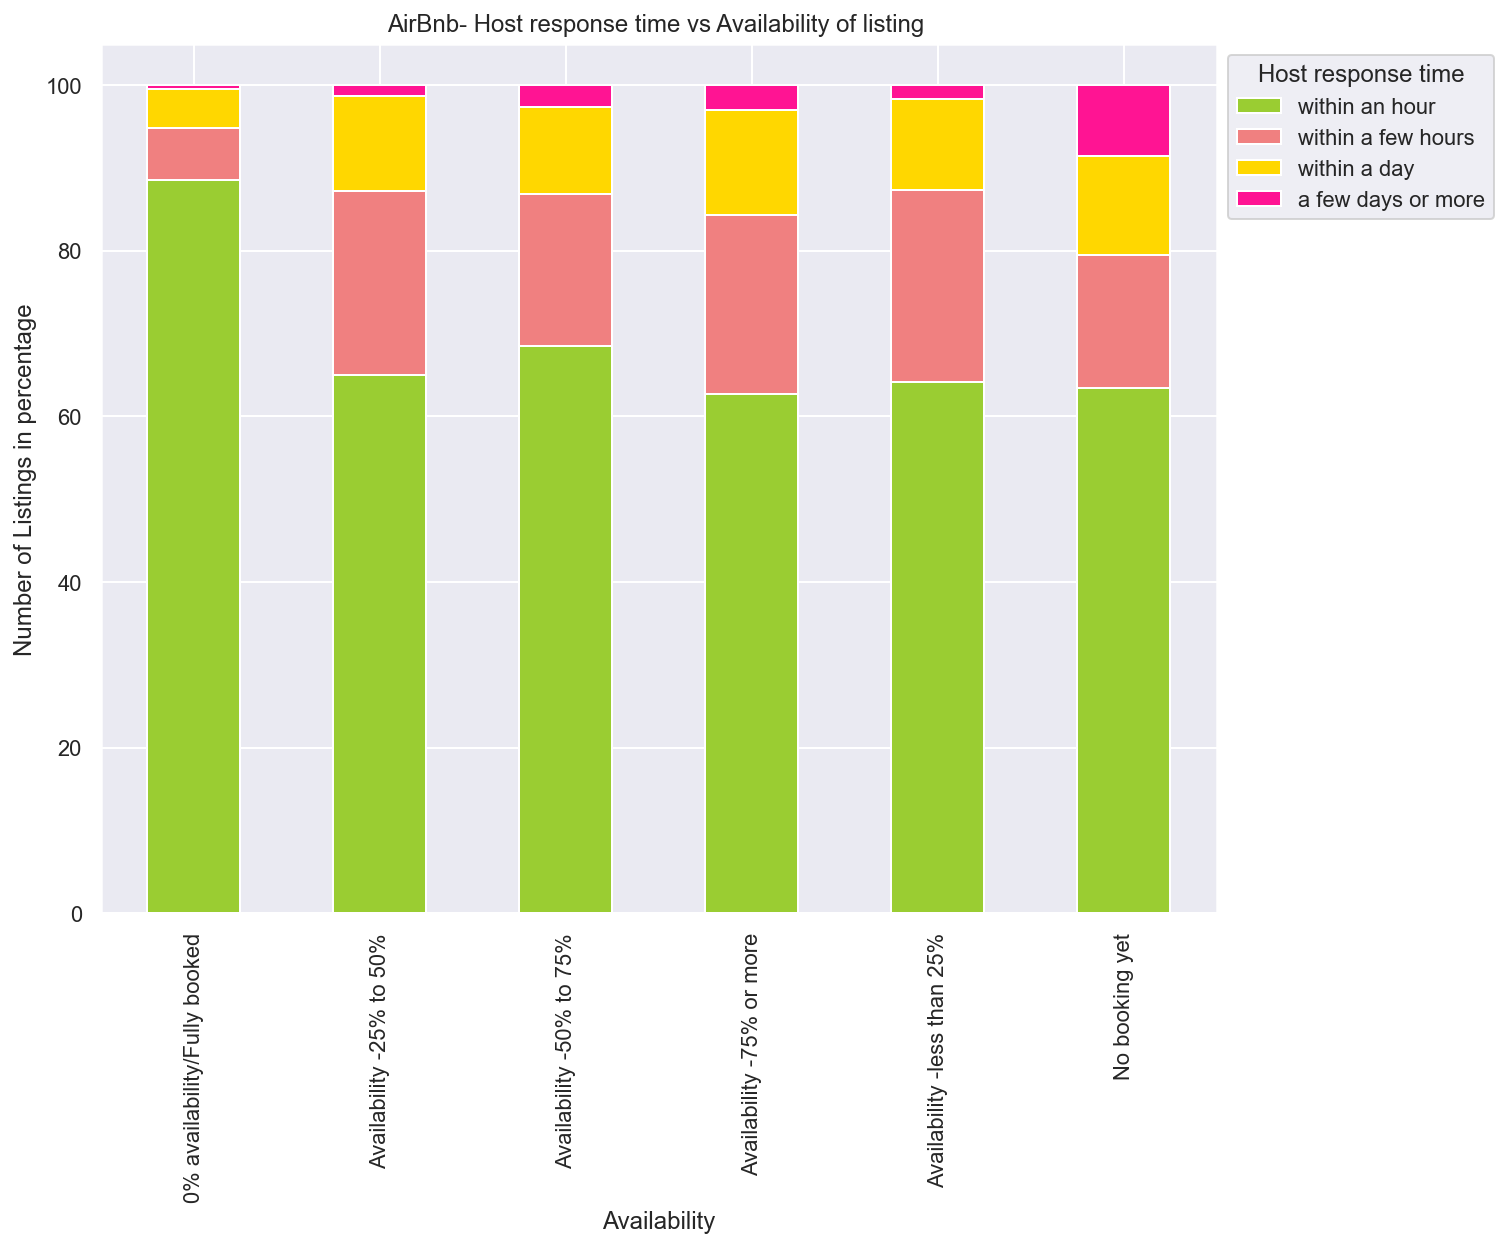

In [17]:
colors=['yellowgreen','lightcoral','gold','deeppink']
sns.set(rc={'figure.figsize':(10,8)})
pivot_table=pd.pivot_table(data,index='Booking_level',columns='host_response_time',values='Success_rate',aggfunc=len,margins=True)
pivot_table=pivot_table.iloc[:,:-1].div(pivot_table.iloc[:,-1],axis=0)*100
pivot_table=pivot_table.iloc[:-1,:]
fig=plt.figure()
ax=pivot_table.plot.bar(stacked=True,color = colors)
ax.legend(loc='best',bbox_to_anchor=(1,1),ncol=1,
         labels=['within an hour', 'within a few hours', 'within a day', 'a few days or more'],title='Host response time')
ax.set_title("AirBnb- Host response time vs Availability of listing ")
ax.set_xlabel('Availability')
ax.set_ylabel('Number of Listings in percentage')

In [18]:
colors=['firebrick','orange','limegreen','cornflowerblue','darkkhaki','lightseagreen','lavender','midnightblue','darkmagenta',
       'gray','lightgray','whitesmoke','lightcoral','violet','greenyellow','azure','deeppink']

<Figure size 720x576 with 0 Axes>

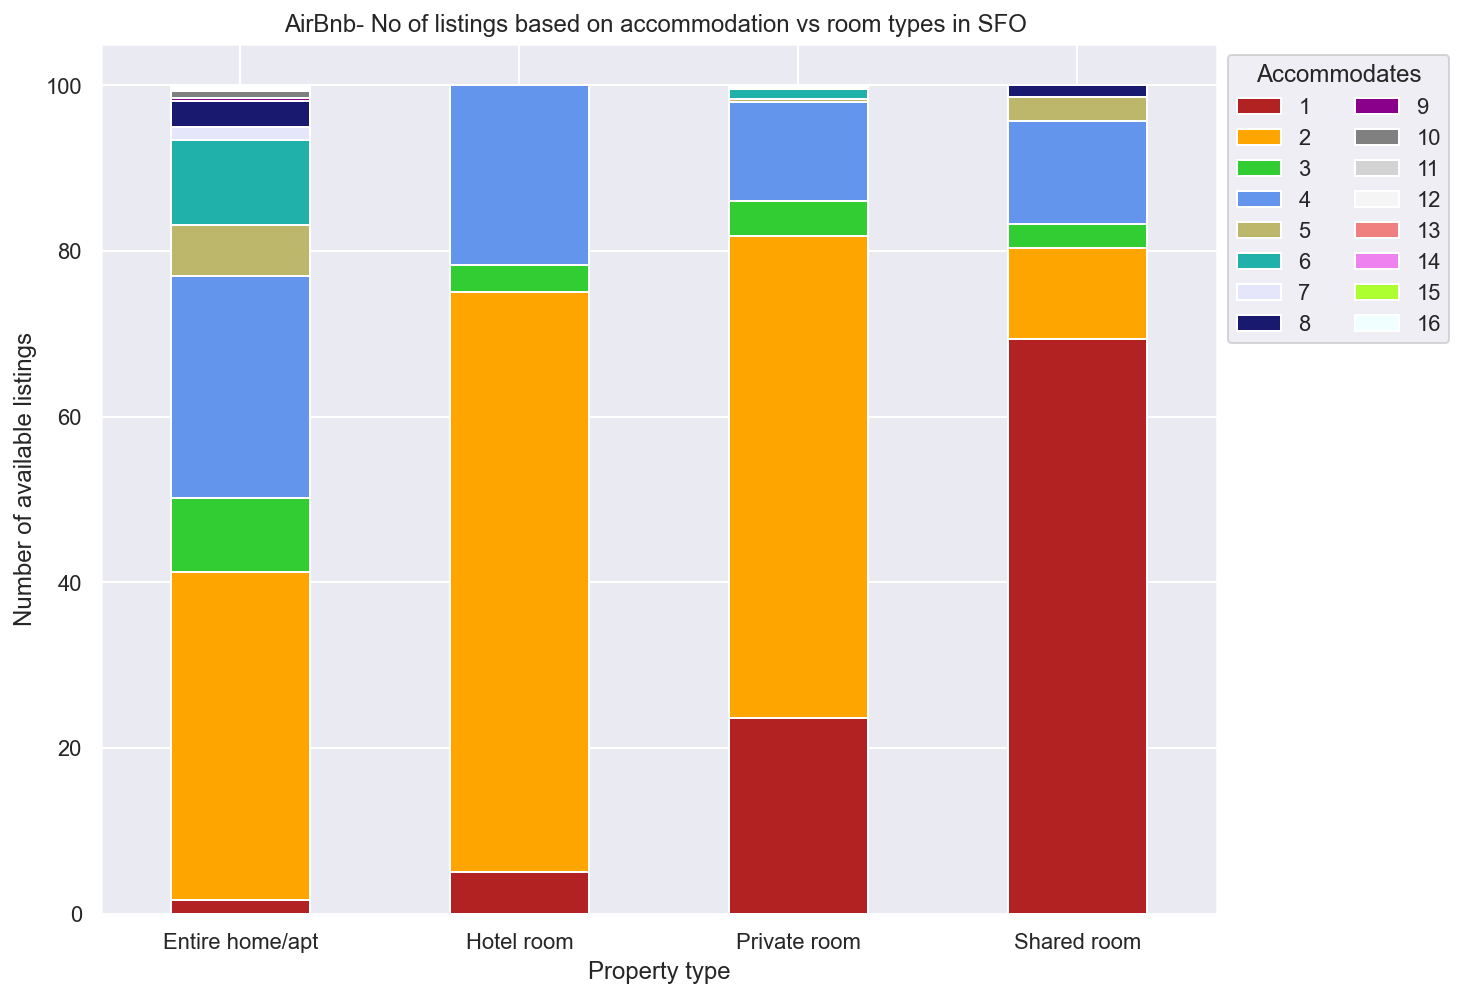

In [19]:
pivot_table=pd.pivot_table(data,index='room_type',columns='accommodates',values='Success_rate',aggfunc=len,margins=True)
pivot_table=pivot_table.iloc[:,:-1].div(pivot_table.iloc[:,-1],axis=0)*100
pivot_table=pivot_table.iloc[:-1,:]
fig=plt.figure()
ax=pivot_table.plot.bar(stacked=True,color = colors)
ax.legend(loc='best',bbox_to_anchor=(1,1),ncol=2,title='Accommodates')
ax.set_title("AirBnb- No of listings based on accommodation vs room types in SFO ")
ax.set_xlabel('Property type')
ax.set_ylabel('Number of available listings')
ax.set_xticklabels(pivot_table.index,rotation=0)
plt.show()

accommodates        1       2      3       4      5      6     7      8   \
room_type                                                                  
Entire home/apt   65.0  1617.0  368.0  1096.0  248.0  422.0  62.0  130.0   
Hotel room         3.0    42.0    2.0    13.0    NaN    NaN   NaN    NaN   
Private room     502.0  1240.0   90.0   254.0    8.0   25.0   4.0    2.0   
Shared room       95.0    15.0    4.0    17.0    4.0    NaN   NaN    2.0   

accommodates       9     10   11    12   13   14   15   16  
room_type                                                   
Entire home/apt  15.0  34.0  9.0  10.0  1.0  2.0  1.0  5.0  
Hotel room        NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  
Private room      1.0   1.0  NaN   2.0  NaN  NaN  NaN  NaN  
Shared room       NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  


<Figure size 720x576 with 0 Axes>

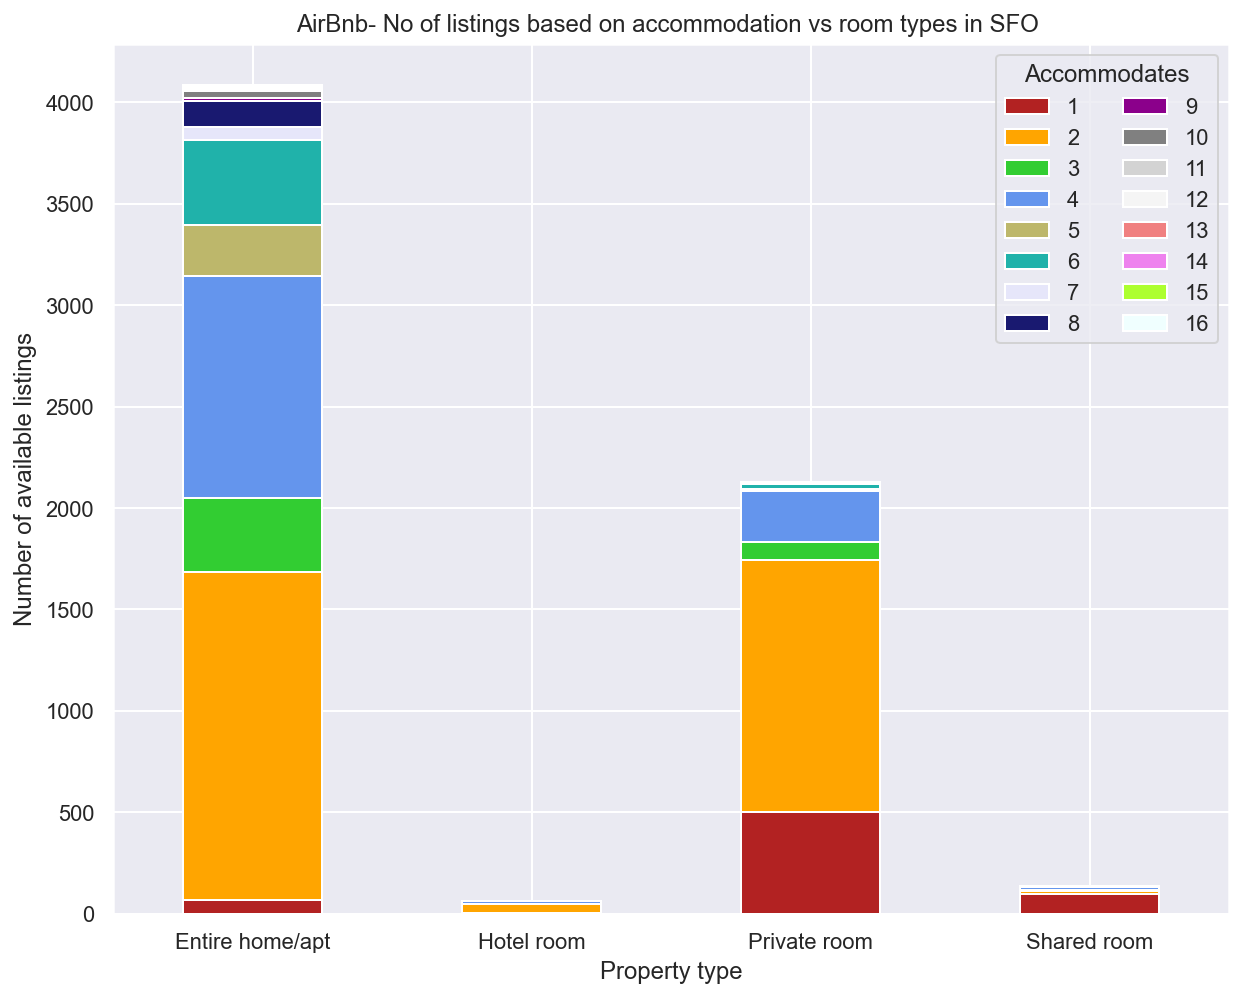

In [20]:
pivot_table=pd.pivot_table(data,index='room_type',columns='accommodates',values='Success_rate',aggfunc='count')
print(pivot_table)
fig=plt.figure()
ax=pivot_table.plot.bar(stacked=True,color = colors)
ax.legend(loc='upper right',bbox_to_anchor=(1,1),ncol=2,title='Accommodates')
ax.set_title("AirBnb- No of listings based on accommodation vs room types in SFO ")
ax.set_xlabel('Property type')
ax.set_ylabel('Number of available listings')
ax.set_xticklabels(pivot_table.index,rotation=0)
plt.show()

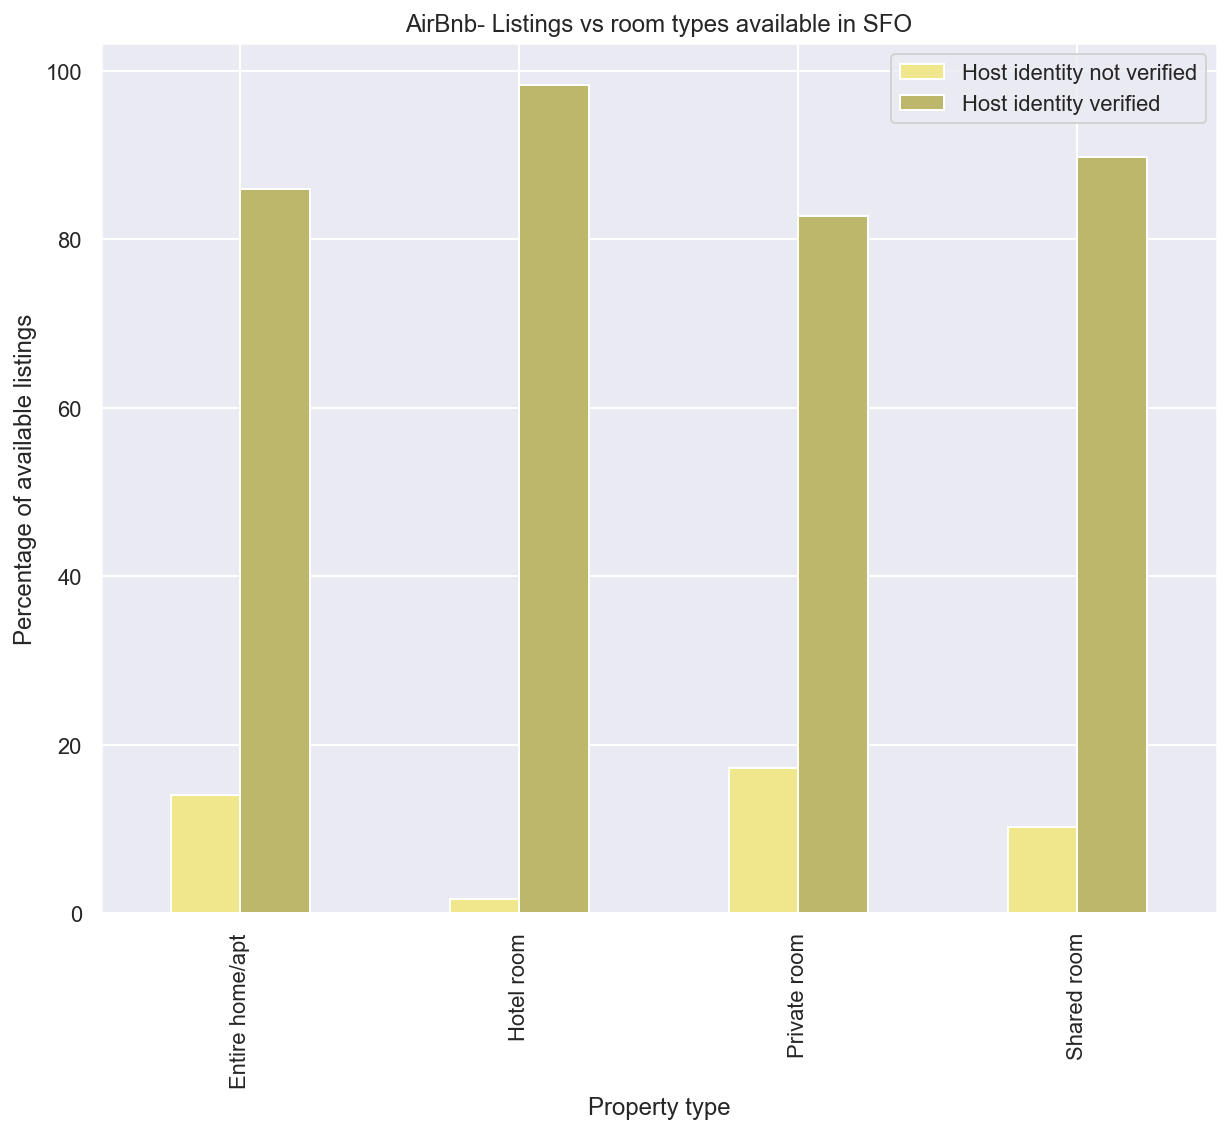

host_identity_verified          f          t
room_type                                   
Entire home/apt         14.051408  85.948592
Hotel room               1.666667  98.333333
Private room            17.285110  82.714890
Shared room             10.218978  89.781022


In [21]:
colors=['khaki','darkkhaki']
pivot_table=pd.pivot_table(data,index='room_type',columns='host_identity_verified',values='Success_rate',aggfunc=len,margins=True)
pivot_table=pivot_table.iloc[:,:-1].div(pivot_table.iloc[:,-1],axis=0)*100
pivot_table=pivot_table.iloc[:-1,:]
sns.set(rc={'figure.figsize':(10,8)})
pivot_table.plot.bar(stacked=False,color = colors)
plt.legend(loc='upper right',bbox_to_anchor=(1,1),ncol=1,labels=['Host identity not verified','Host identity verified'])
plt.title("AirBnb- Listings vs room types available in SFO")
plt.xlabel('Property type')
plt.ylabel('Percentage of available listings')
plt.show()
print(pivot_table)

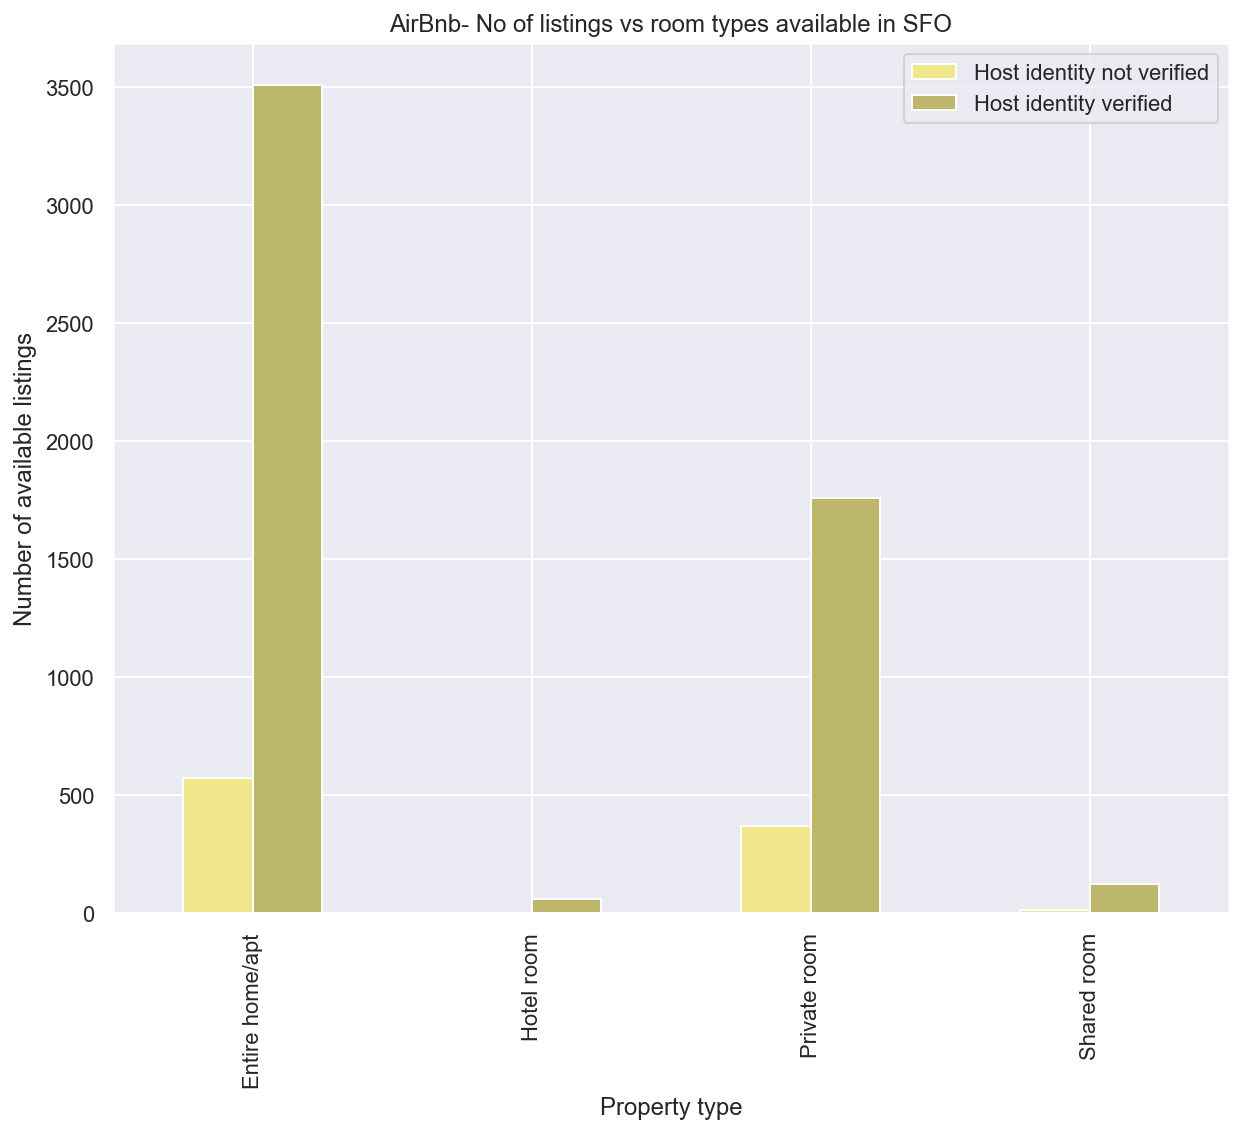

host_identity_verified    f     t
room_type                        
Entire home/apt         574  3511
Hotel room                1    59
Private room            368  1761
Shared room              14   123


In [22]:
colors=['khaki','darkkhaki']
pivot_table=pd.pivot_table(data,index='room_type',columns='host_identity_verified',values='Success_rate',aggfunc='count')
pivot_table.plot.bar(stacked=False,color = colors)
plt.legend(loc='upper right',bbox_to_anchor=(1,1),ncol=1,labels=['Host identity not verified','Host identity verified'])
plt.title("AirBnb- No of listings vs room types available in SFO")
plt.xlabel('Property type')
plt.ylabel('Number of available listings')
plt.show()
print(pivot_table)

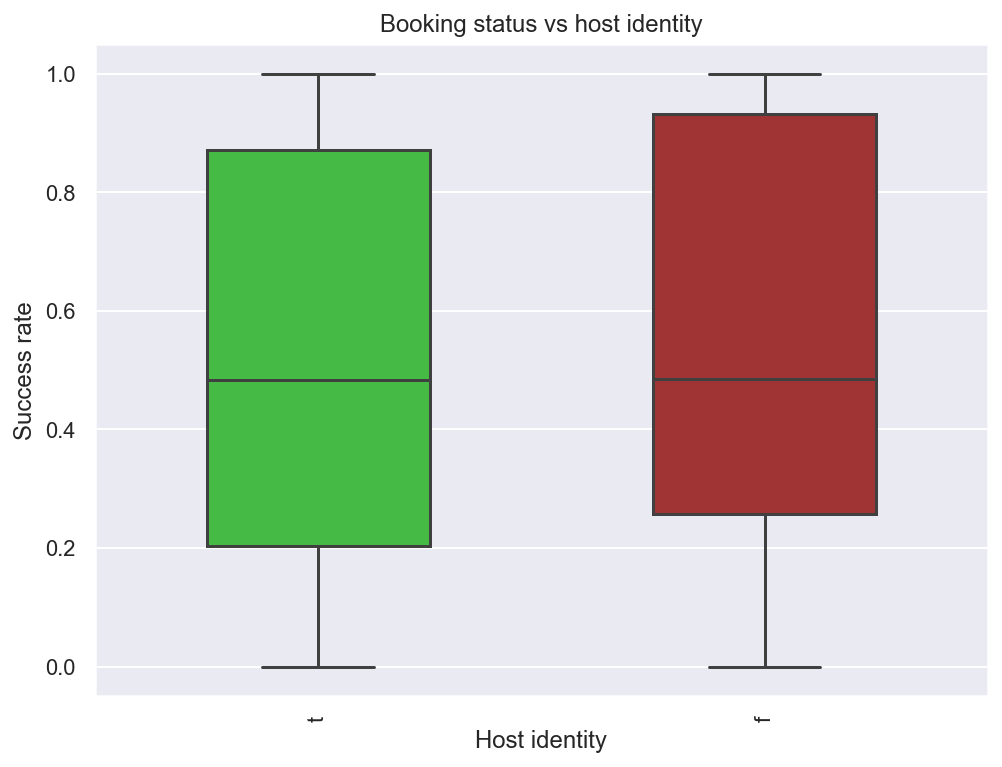

In [23]:
colors=['limegreen','firebrick','lightcoral','cornflowerblue','gold','darkkhaki']
#sort=['0% availability/Fully booked','Availability -less than 25%','Availability -25% to 50%','Availability -50% to 75%','Availability -75% or more','No booking yet']
#palette='colorblind'
plt.figure(figsize=(8,6))
boxplot=sns.boxplot(y='Success_rate',x='host_identity_verified',data=data,width=0.5,palette=colors,showfliers=False,
                   )
boxplot.tick_params(axis='x',rotation=90)
boxplot.ticklabel_format(axis='y',style='plain', useOffset=False)
boxplot.set_title('Booking status vs host identity')
boxplot.set_xlabel('Host identity')
boxplot.set_ylabel('Success rate')
plt.show()

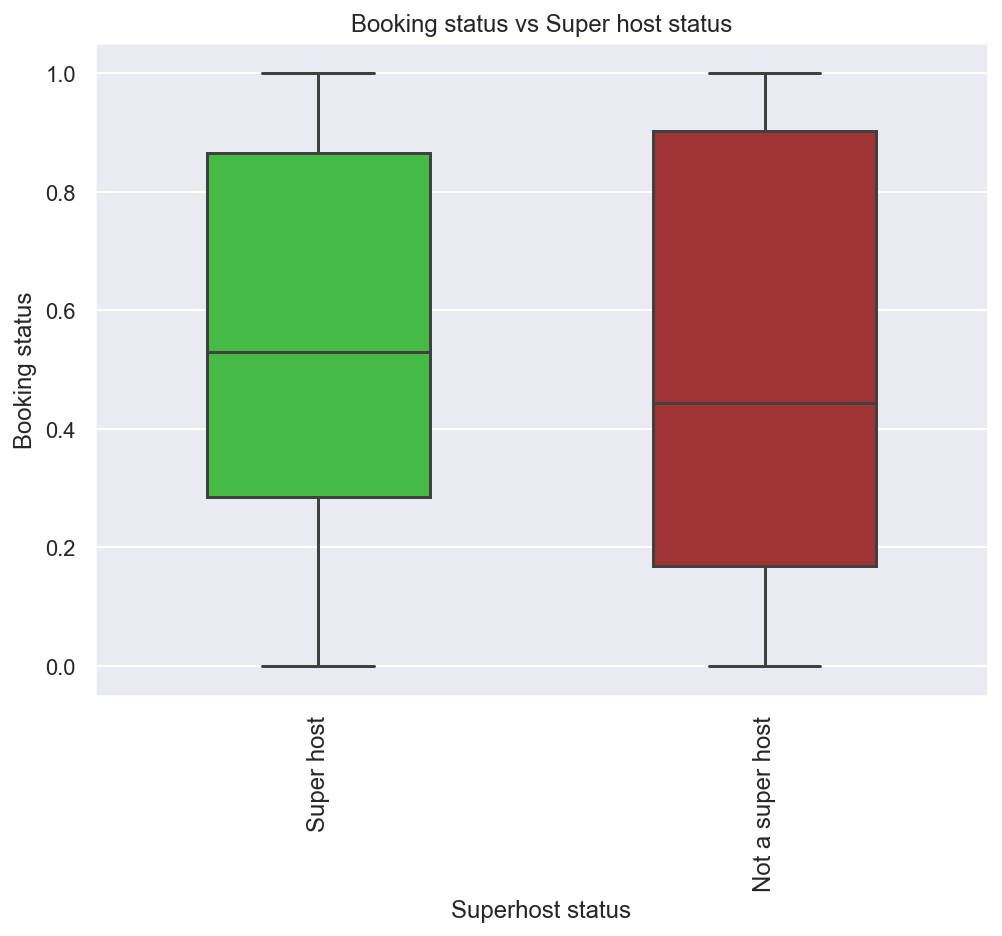

In [24]:
colors=['limegreen','firebrick','lightcoral','cornflowerblue','gold','darkkhaki']
#sort=['0% availability/Fully booked','Availability -less than 25%','Availability -25% to 50%','Availability -50% to 75%','Availability -75% or more','No booking yet']
#palette='colorblind'
plt.figure(figsize=(8,6))
boxplot=sns.boxplot(y='Success_rate',x='host_is_superhost',data=data,width=0.5,palette=colors,showfliers=False,)
boxplot.set_xticklabels(['Super host','Not a super host'],rotation=90,fontsize='medium')
#boxplot.tick_params(axis='x',rotation=90)
boxplot.ticklabel_format(axis='y',style='plain', useOffset=False)
boxplot.set_title('Booking status vs Super host status')
boxplot.set_xlabel('Superhost status')
boxplot.set_ylabel('Booking status')
plt.show()

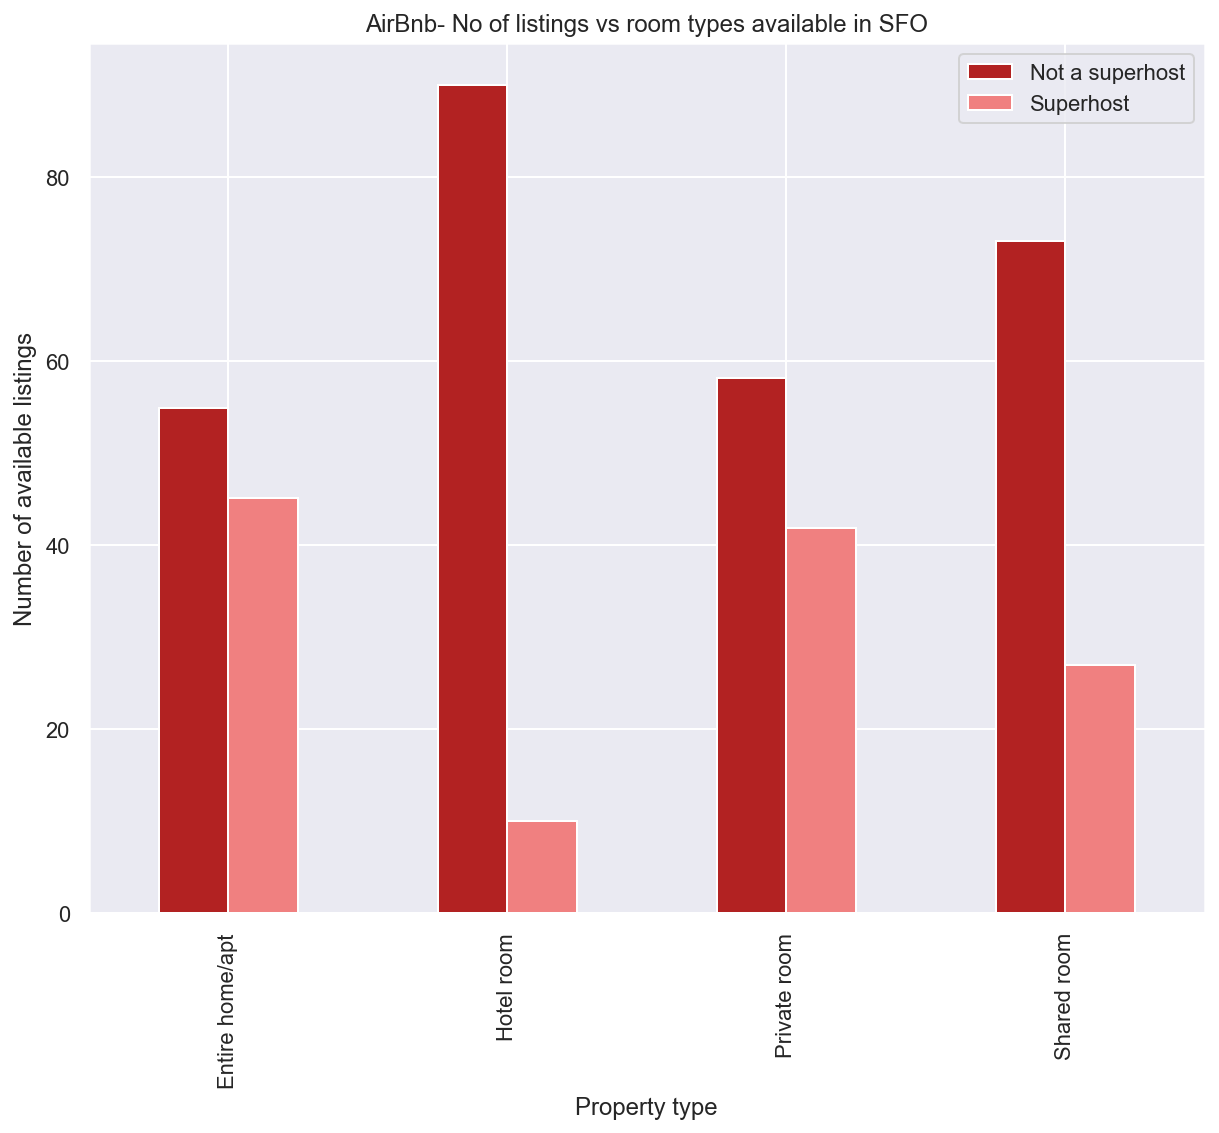

In [25]:
colors=['firebrick','lightcoral']
sns.set(rc={'figure.figsize':(10,8)})
pivot_table=pd.pivot_table(data,index='room_type',columns='host_is_superhost',values='Success_rate',aggfunc=len,margins=True)
pivot_table=pivot_table.iloc[:,:-1].div(pivot_table.iloc[:,-1],axis=0)*100
pivot_table=pivot_table.iloc[:-1,:]
pivot_table.plot.bar(stacked=False,color = colors)
plt.legend(loc='upper right',bbox_to_anchor=(1,1),ncol=1,labels=['Not a superhost','Superhost'])
plt.title("AirBnb- No of listings vs room types available in SFO")
plt.xlabel('Property type')
plt.ylabel('Number of available listings')
plt.show()

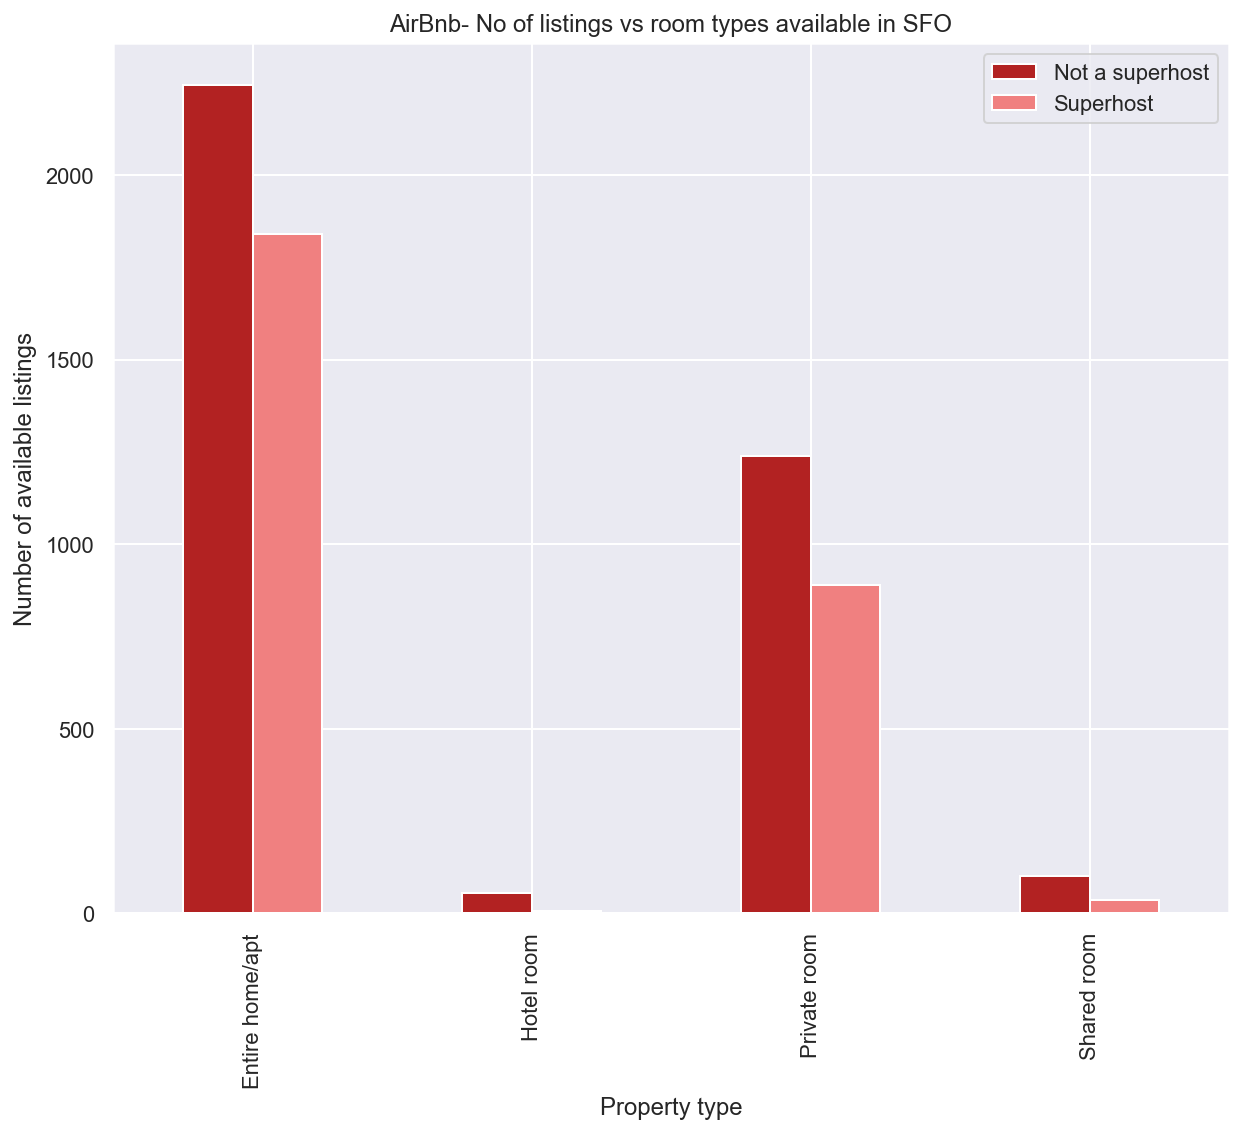

host_is_superhost     f     t
room_type                    
Entire home/apt    2244  1841
Hotel room           54     6
Private room       1239   890
Shared room         100    37


In [26]:
pivot_table=pd.pivot_table(data,index='room_type',columns='host_is_superhost',values='Success_rate',aggfunc='count')
pivot_table.plot.bar(stacked=False,color = colors)
plt.legend(loc='upper right',bbox_to_anchor=(1,1),ncol=1,labels=['Not a superhost','Superhost'])
plt.title("AirBnb- No of listings vs room types available in SFO")
plt.xlabel('Property type')
plt.ylabel('Number of available listings')
plt.show()
print(pivot_table)

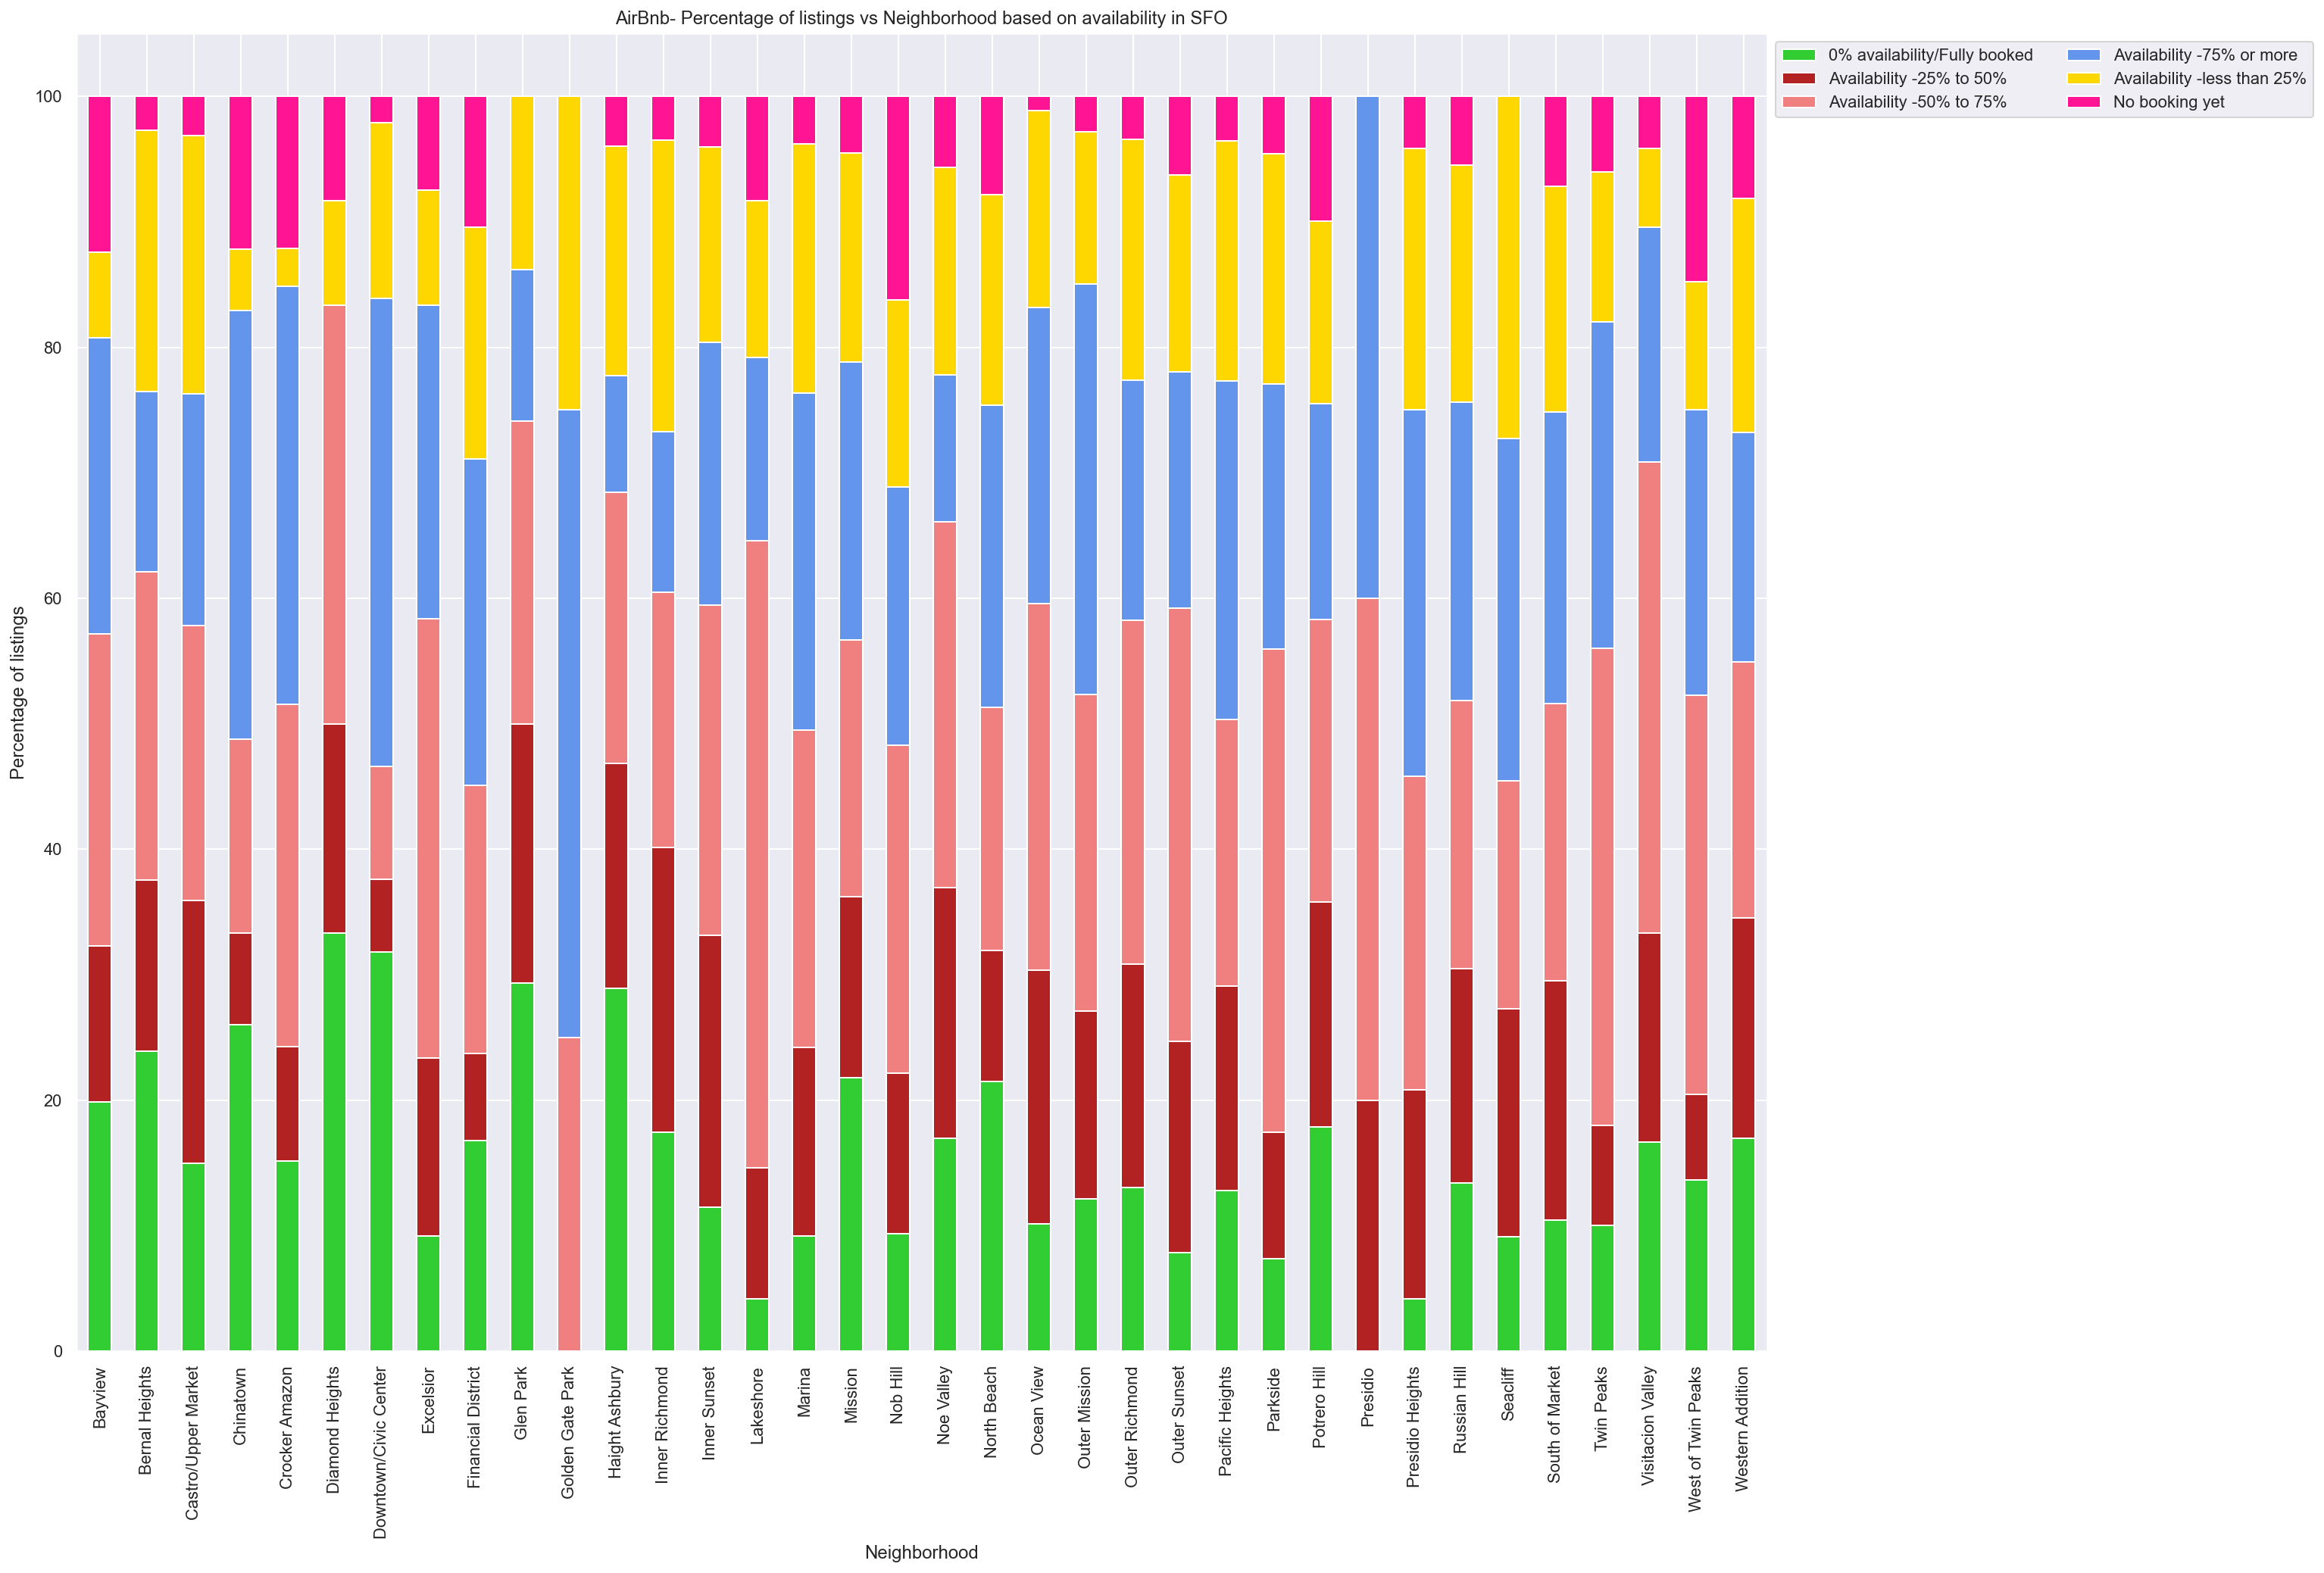

In [27]:
colors=['limegreen','firebrick','lightcoral','cornflowerblue','gold','deeppink']
sns.set(rc={'figure.figsize':(20,16)})
pivot_table=pd.pivot_table(data,index='neighbourhood_cleansed',columns='Booking_level',values='Success_rate',aggfunc=len,margins=True)
pivot_table=pivot_table.iloc[:,:-1].div(pivot_table.iloc[:,-1],axis=0)*100
pivot_table=pivot_table.iloc[:-1,:]
pivot_table.plot.bar(stacked=True,color = colors,width=0.5)
plt.legend(loc='best',bbox_to_anchor=(1,1),ncol=2)
plt.title("AirBnb- Percentage of listings vs Neighborhood based on availability in SFO")
plt.xlabel('Neighborhood')
plt.ylabel('Percentage of listings')
plt.show()

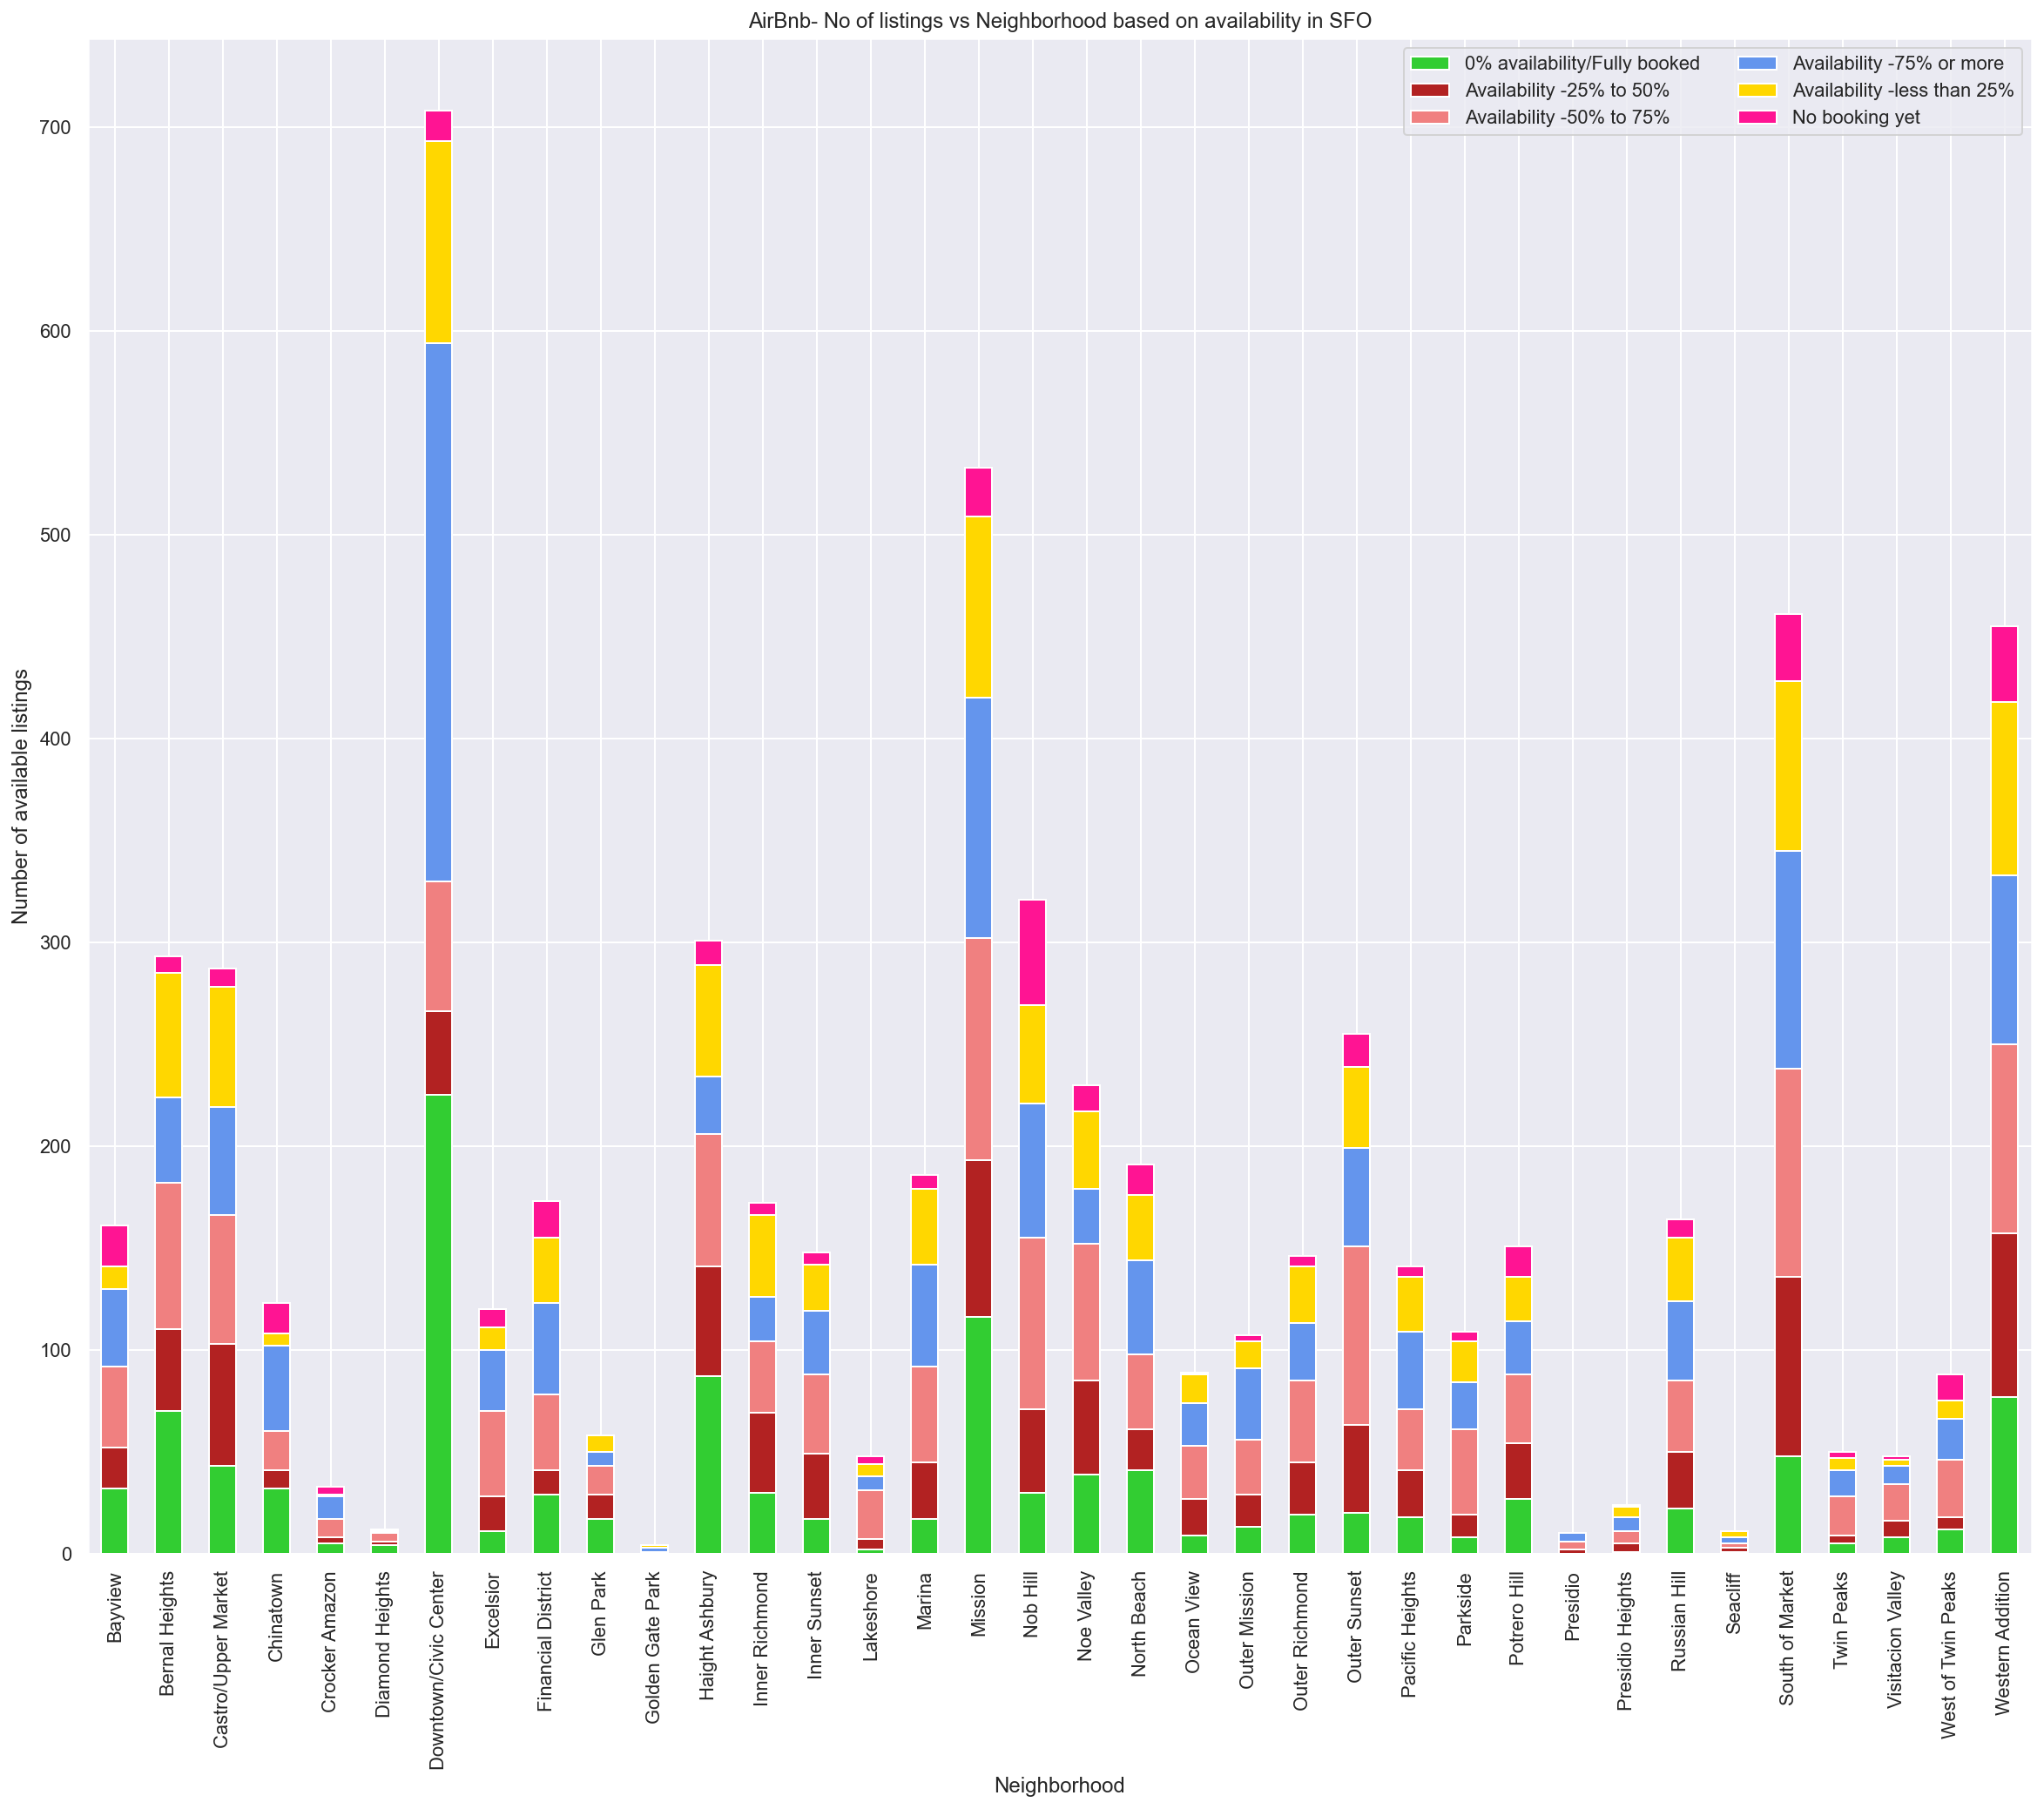

In [28]:

pivot_table=pd.pivot_table(data,index='neighbourhood_cleansed',columns='Booking_level',values='Success_rate',aggfunc='count')
pivot_table.plot.bar(stacked=True,color = colors)
plt.legend(loc='upper right',bbox_to_anchor=(1,1),ncol=2)
plt.title("AirBnb- No of listings vs Neighborhood based on availability in SFO")
plt.xlabel('Neighborhood')
plt.ylabel('Number of available listings')
plt.show()
#print(pivot_table)

In [29]:
min_nights=sorted(data['minimum_nights'].unique())
#print(min_nights,'\n')
max_nights=sorted(data['maximum_nights'].unique())
#print(max_nights)

bins=[15,30,60,90,120,280,366,1125,10000]
data['min_nights_bins']=np.searchsorted(bins, data['minimum_nights'].values)
data['max_nights_bins']=np.searchsorted(bins, data['maximum_nights'].values)
data['min_nights_bins']=data['min_nights_bins'].replace([0,1,2,3,4,5,6,7],
                                ['1-15 days','16-30days','31-60 days','61-90 days','91-120 days',
                                    '121-280 days','281-366 days','367-1125 days'])
data['max_nights_bins']=data['max_nights_bins'].replace([0,1,2,3,4,5,6,7,8],
                                ['1-15 days','16-30 days','31-60 days','61-90 days','91-120 days',
                                    '121-280 days','281-366 days','367-1125 days','more than 1125 days'])
#print(data['min_nights_bins'].unique())
#print((data.loc[data['min_nights_bins']==7,'minimum_nights']).unique())
#print((data.loc[data['max_nights_bins']==8,'maximum_nights']).unique())
#0- <15 days, 1- <30 days, 2- <31 to 60 days, 3-< 61 to 90, 4-< 91 to 120, 5-< 121 to 280, 6-< 281 to 366, 7-<367 to 1125, 8<1126 to 10000

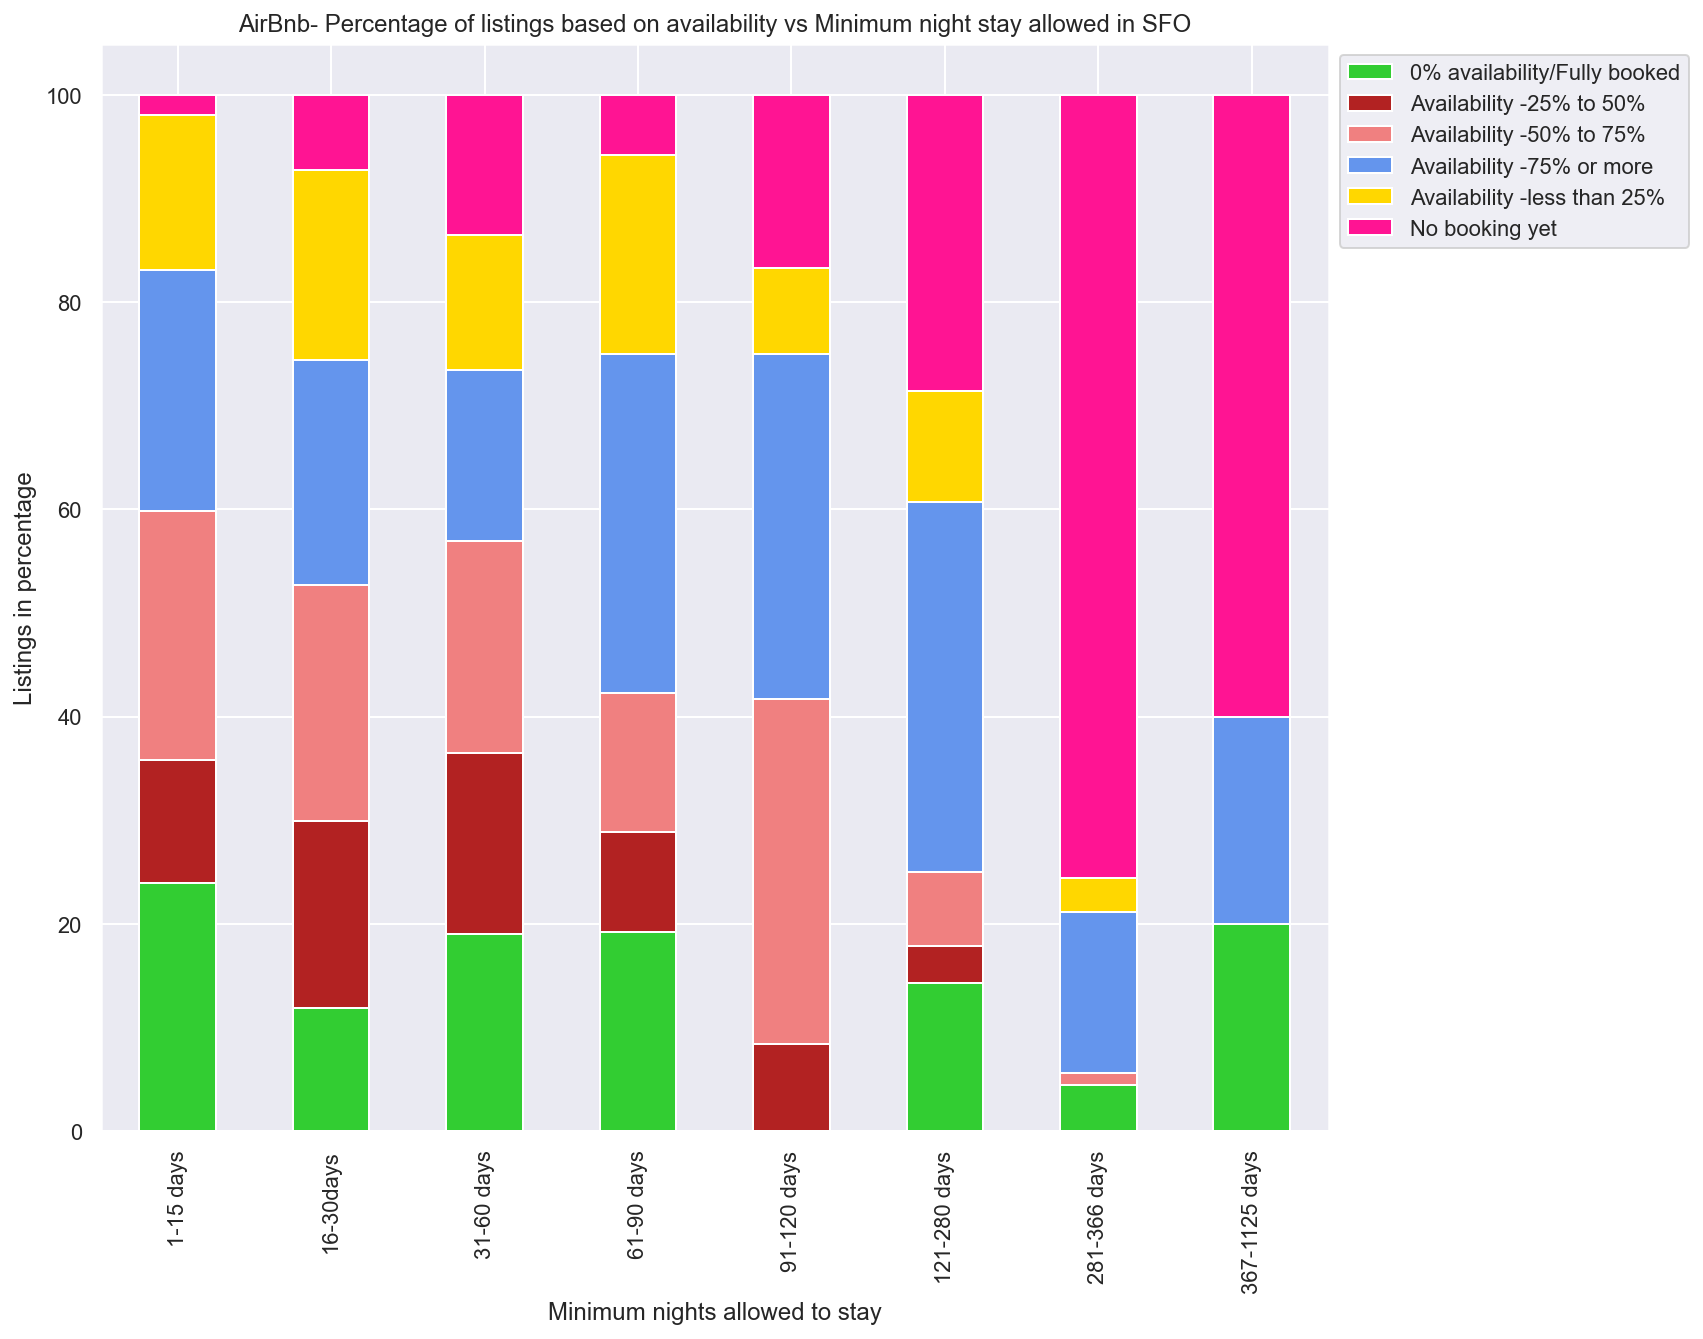

In [30]:
colors=['limegreen','firebrick','lightcoral','cornflowerblue','gold','deeppink','darkkhaki']
sns.set(rc={'figure.figsize':(11,10)})
pivot_table=pd.pivot_table(data,index='min_nights_bins',columns='Booking_level',values='Success_rate',aggfunc=len,margins=True)
pivot_table=pivot_table.iloc[:,:-1].div(pivot_table.iloc[:,-1],axis=0)*100
pivot_table=pivot_table.iloc[:-1,:]
pivot_table=pivot_table.reindex(['1-15 days','16-30days','31-60 days','61-90 days','91-120 days',
                                    '121-280 days','281-366 days','367-1125 days'])
pivot_table.plot.bar(stacked=True,color = colors)
plt.legend(loc='best',bbox_to_anchor=(1,1),ncol=1)
plt.title("AirBnb- Percentage of listings based on availability vs Minimum night stay allowed in SFO")
plt.xlabel('Minimum nights allowed to stay')
plt.ylabel('Listings in percentage')
plt.show()

Booking_level    0% availability/Fully booked  Availability -25% to 50%  \
min_nights_bins                                                           
1-15 days                               720.0                     356.0   
16-30days                               358.0                     546.0   
31-60 days                               38.0                      35.0   
61-90 days                               10.0                       5.0   
91-120 days                               NaN                       1.0   
121-280 days                              4.0                       1.0   
281-366 days                              4.0                       NaN   
367-1125 days                             1.0                       NaN   

Booking_level    Availability -50% to 75%  Availability -75% or more  \
min_nights_bins                                                        
1-15 days                           723.0                      699.0   
16-30days                        

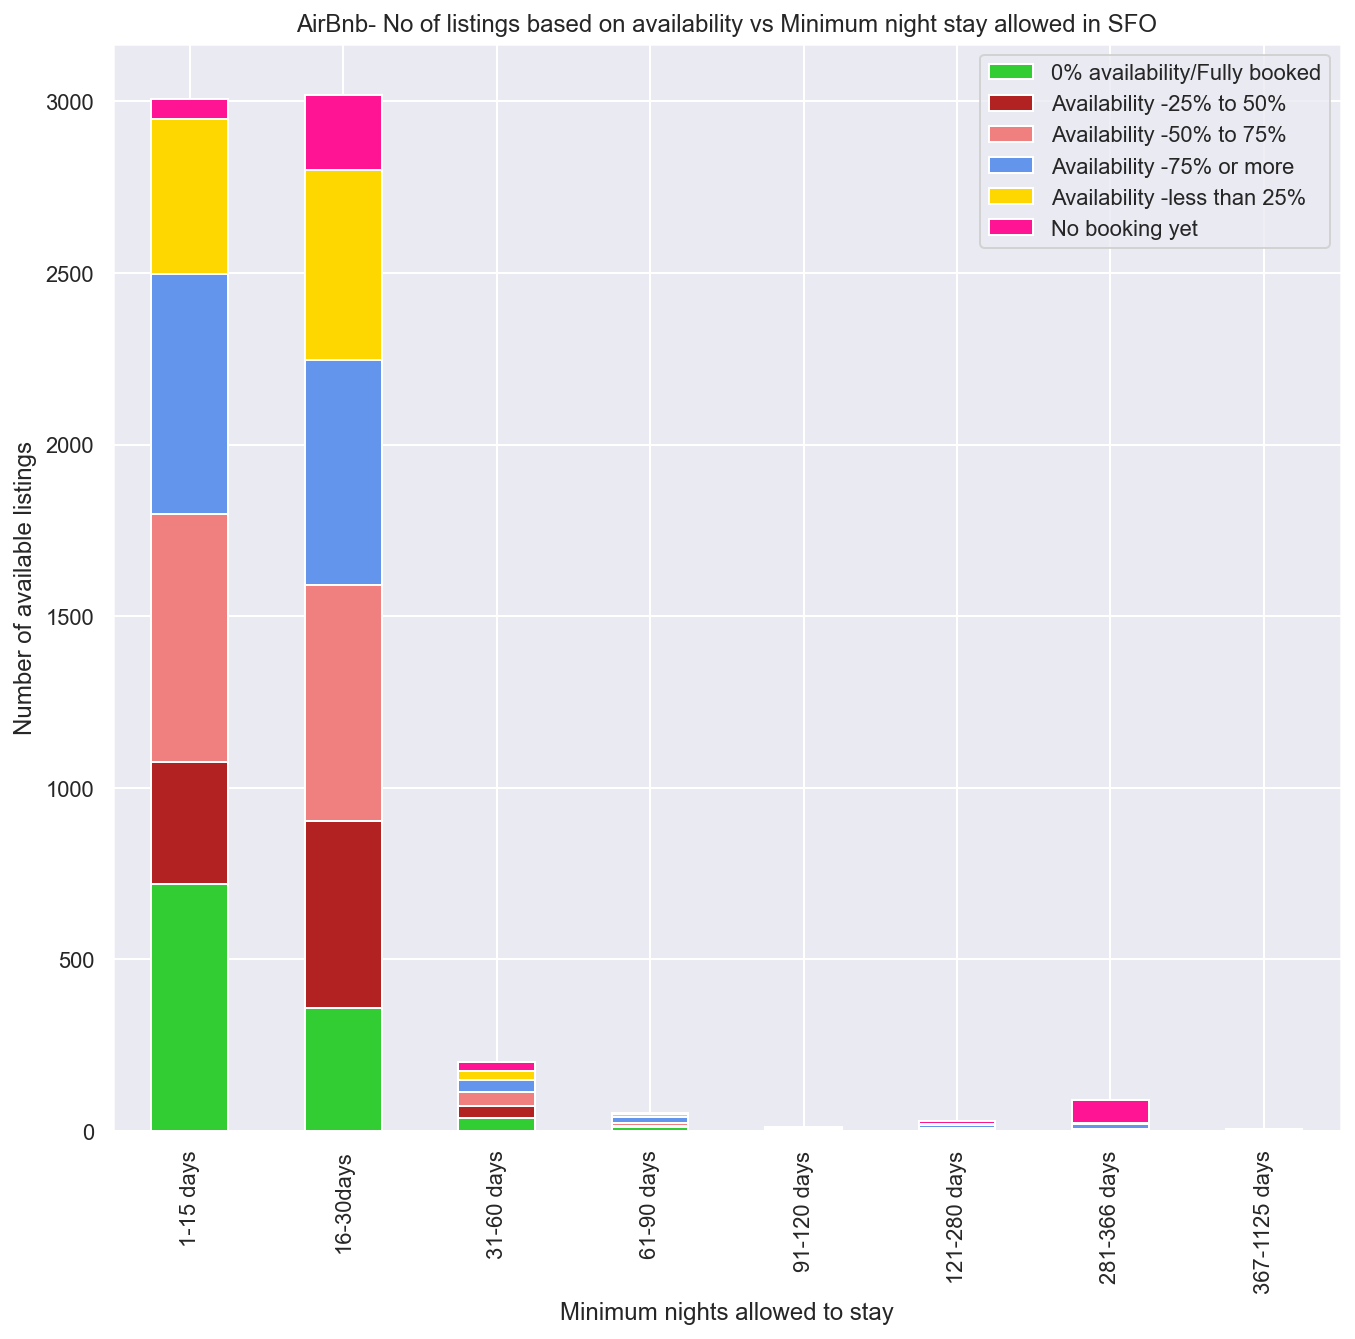

In [31]:
pivot_table=pd.pivot_table(data,index='min_nights_bins',columns='Booking_level',values='Success_rate',aggfunc='count')
pivot_table=pivot_table.reindex(['1-15 days','16-30days','31-60 days','61-90 days','91-120 days',
                                    '121-280 days','281-366 days','367-1125 days'])
print(pivot_table)
pivot_table.plot.bar(stacked=True,color = colors)
plt.legend(loc='best',bbox_to_anchor=(1,1),ncol=1)
plt.title("AirBnb- No of listings based on availability vs Minimum night stay allowed in SFO")
plt.xlabel('Minimum nights allowed to stay')
plt.ylabel('Number of available listings')
plt.show()

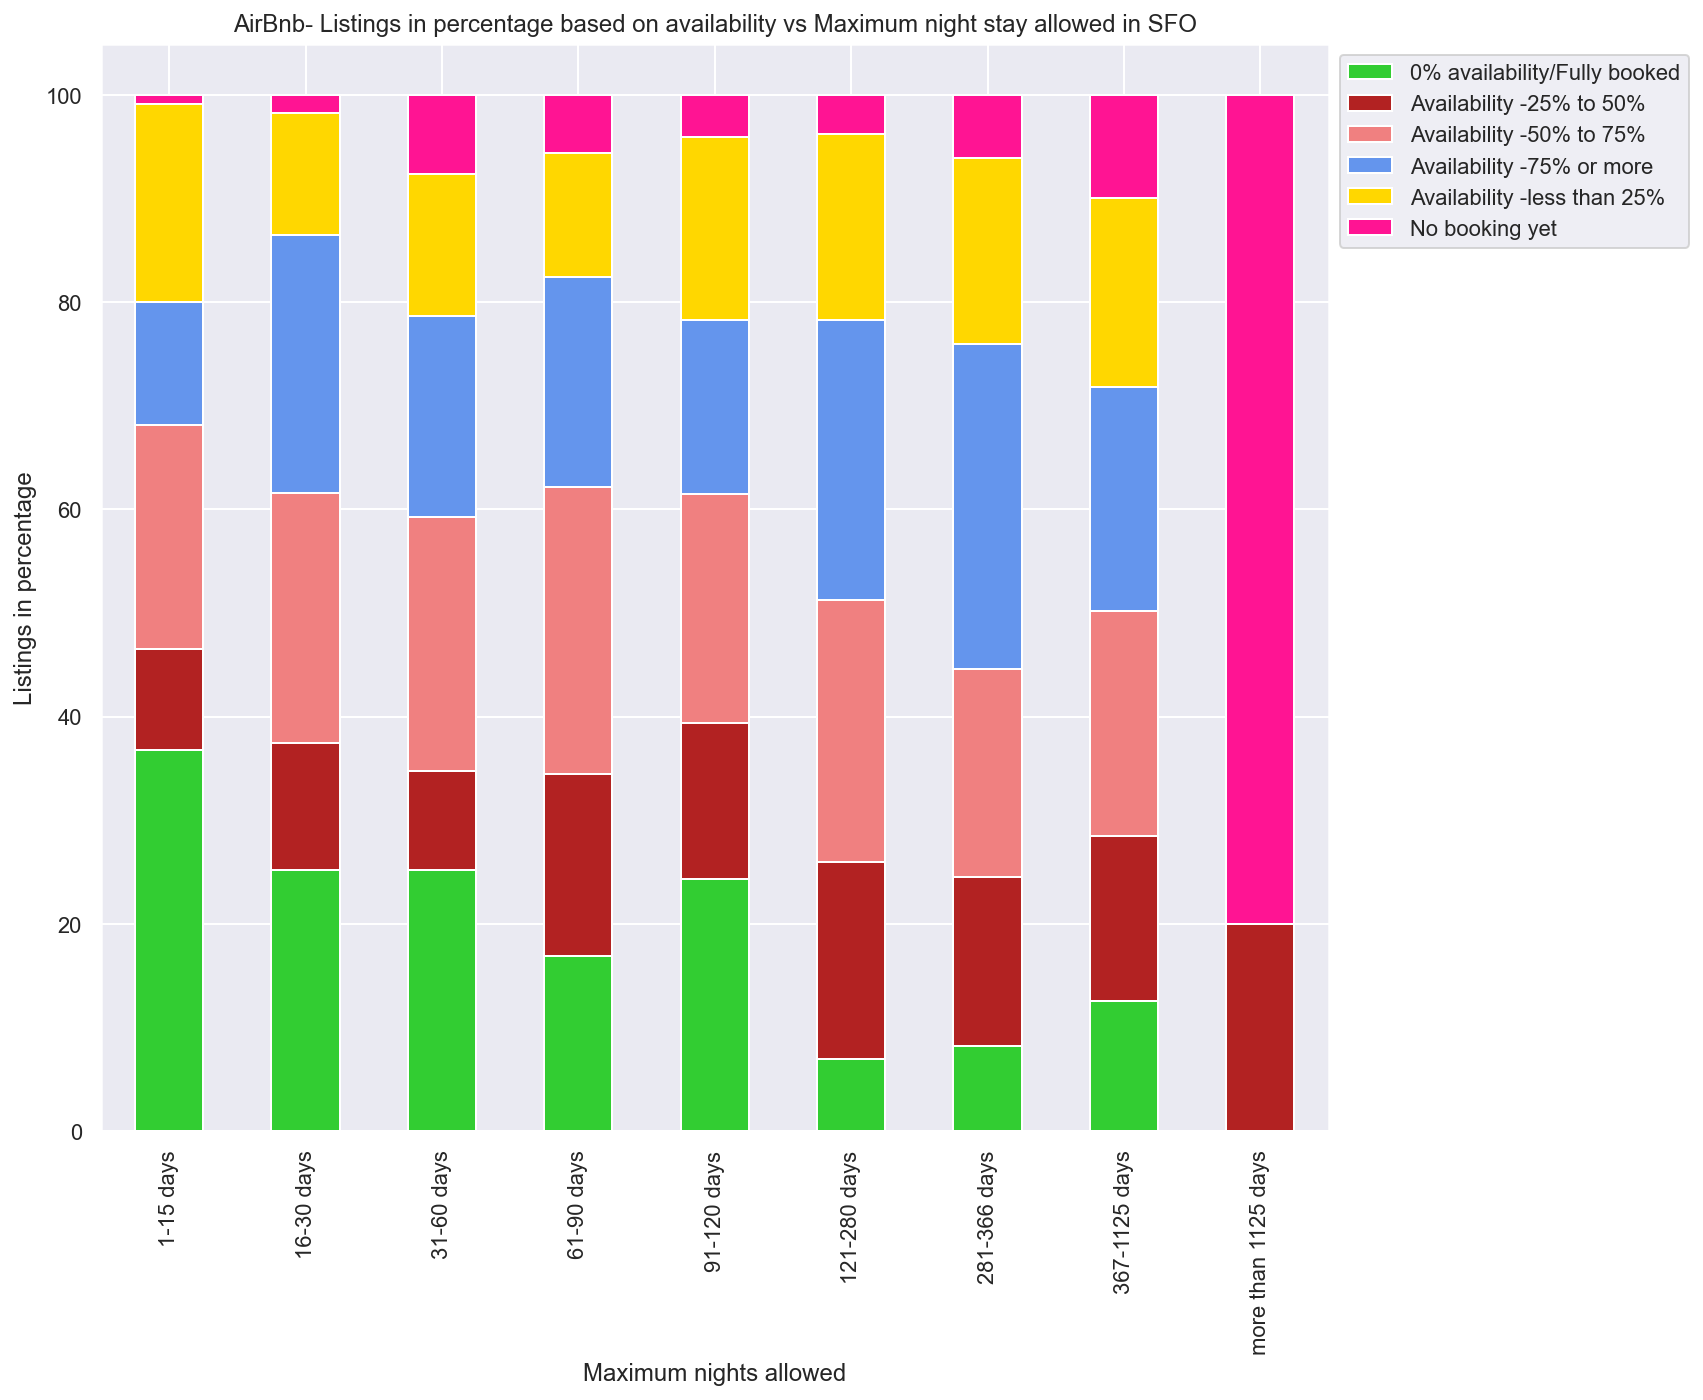

In [32]:
colors=['limegreen','firebrick','lightcoral','cornflowerblue','gold','deeppink','darkkhaki']
sns.set(rc={'figure.figsize':(11,10)})
pivot_table=pd.pivot_table(data,index='max_nights_bins',columns='Booking_level',values='Success_rate',aggfunc=len,margins=True)
pivot_table=pivot_table.iloc[:,:-1].div(pivot_table.iloc[:,-1],axis=0)*100
pivot_table=pivot_table.iloc[:-1,:]
pivot_table=pivot_table.reindex(['1-15 days','16-30 days','31-60 days','61-90 days','91-120 days',
                                    '121-280 days','281-366 days','367-1125 days','more than 1125 days'])
pivot_table.plot.bar(stacked=True,color = colors)
plt.legend(loc='best',bbox_to_anchor=(1,1),ncol=1)
plt.title("AirBnb- Listings in percentage based on availability vs Maximum night stay allowed in SFO")
plt.xlabel('Maximum nights allowed')
plt.ylabel('Listings in percentage')
plt.show()

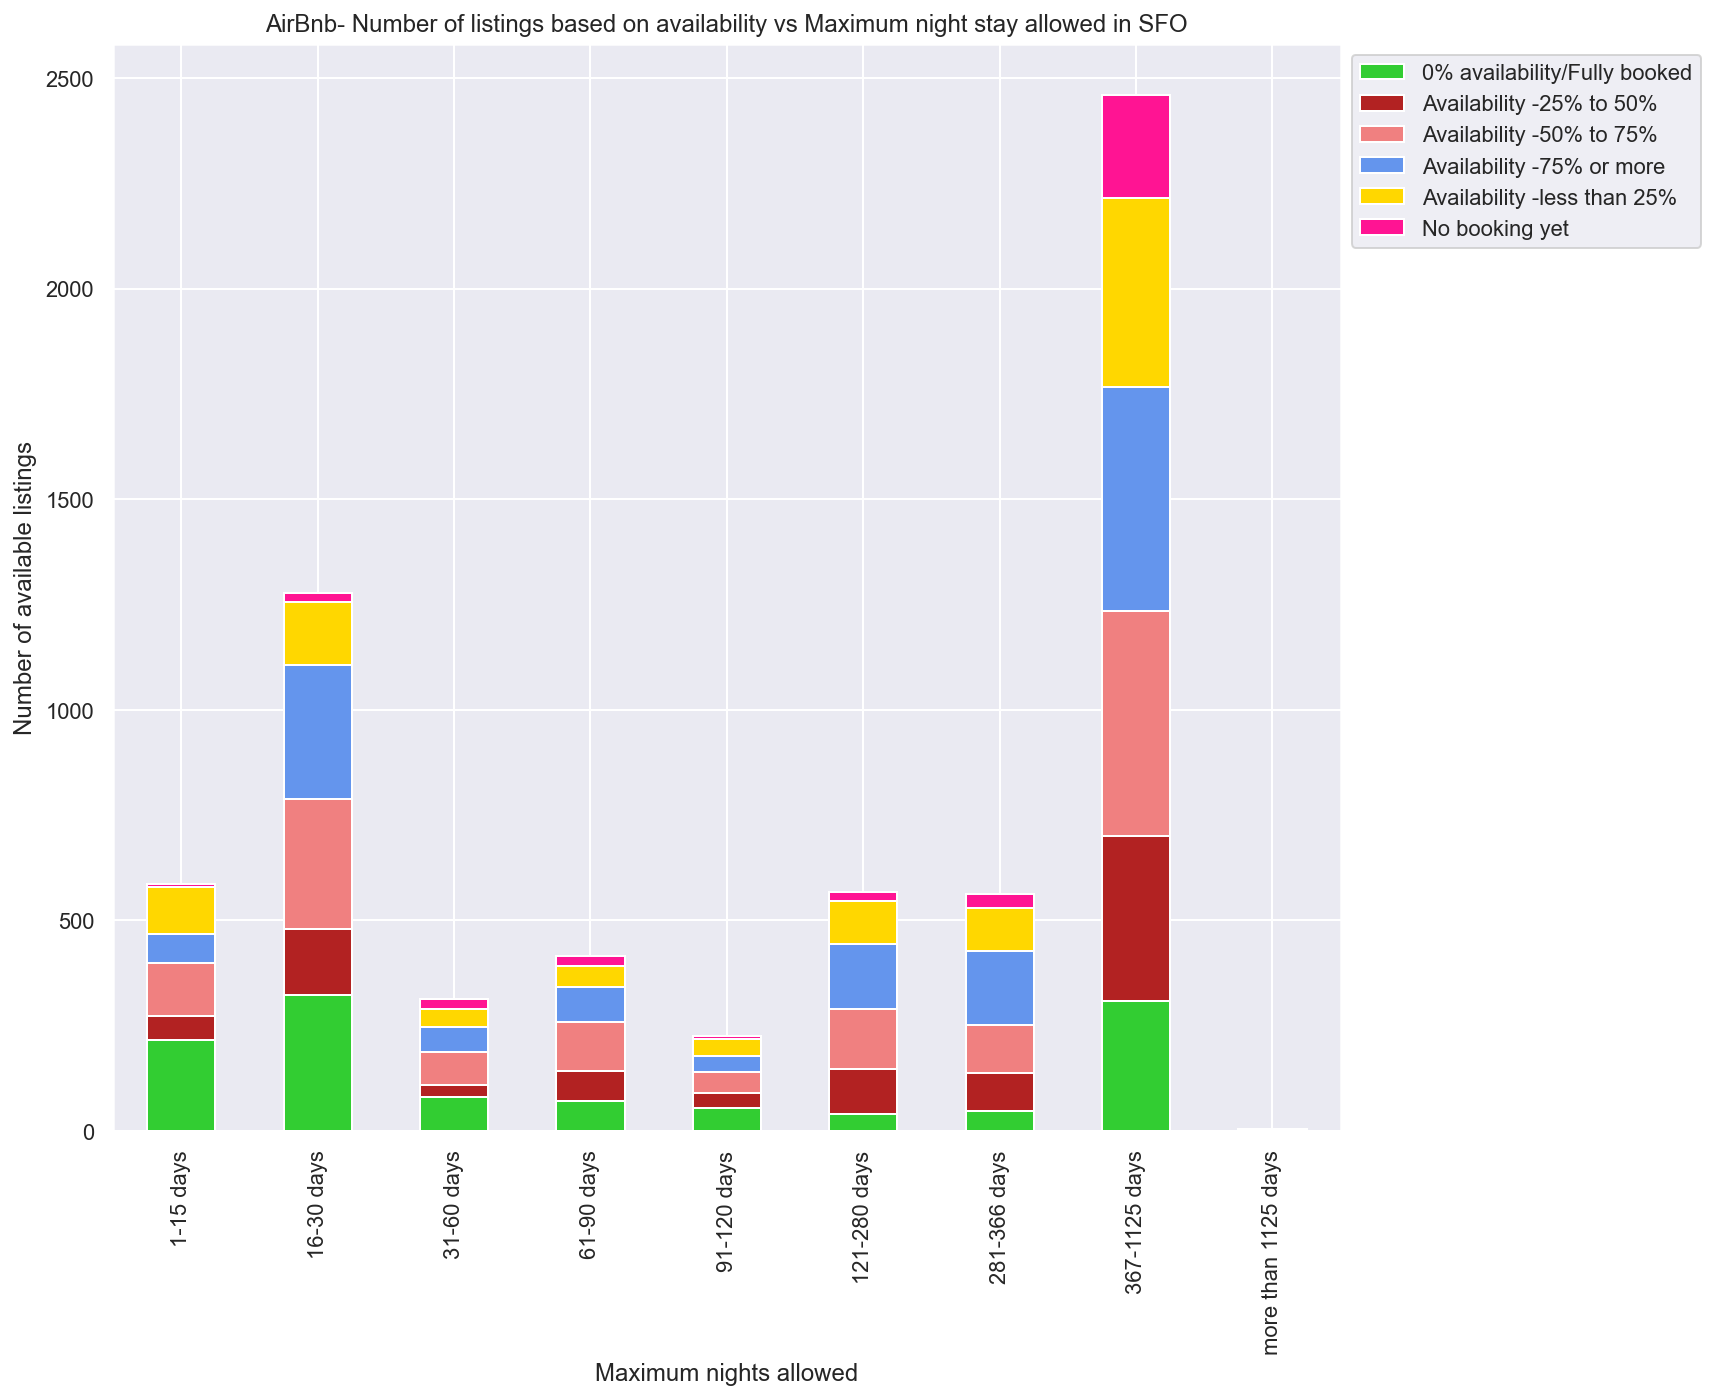

In [33]:
pivot_table=pd.pivot_table(data,index='max_nights_bins',columns='Booking_level',values='Success_rate',aggfunc='count')
pivot_table=pivot_table.reindex(['1-15 days','16-30 days','31-60 days','61-90 days','91-120 days',
                                    '121-280 days','281-366 days','367-1125 days','more than 1125 days'])
pivot_table.plot.bar(stacked=True,color = colors)
plt.legend(loc='best',bbox_to_anchor=(1,1),ncol=1)
plt.title("AirBnb- Number of listings based on availability vs Maximum night stay allowed in SFO")
plt.xlabel('Maximum nights allowed')
plt.ylabel('Number of available listings')
plt.show()

Text(0, 0.5, 'Mean price')

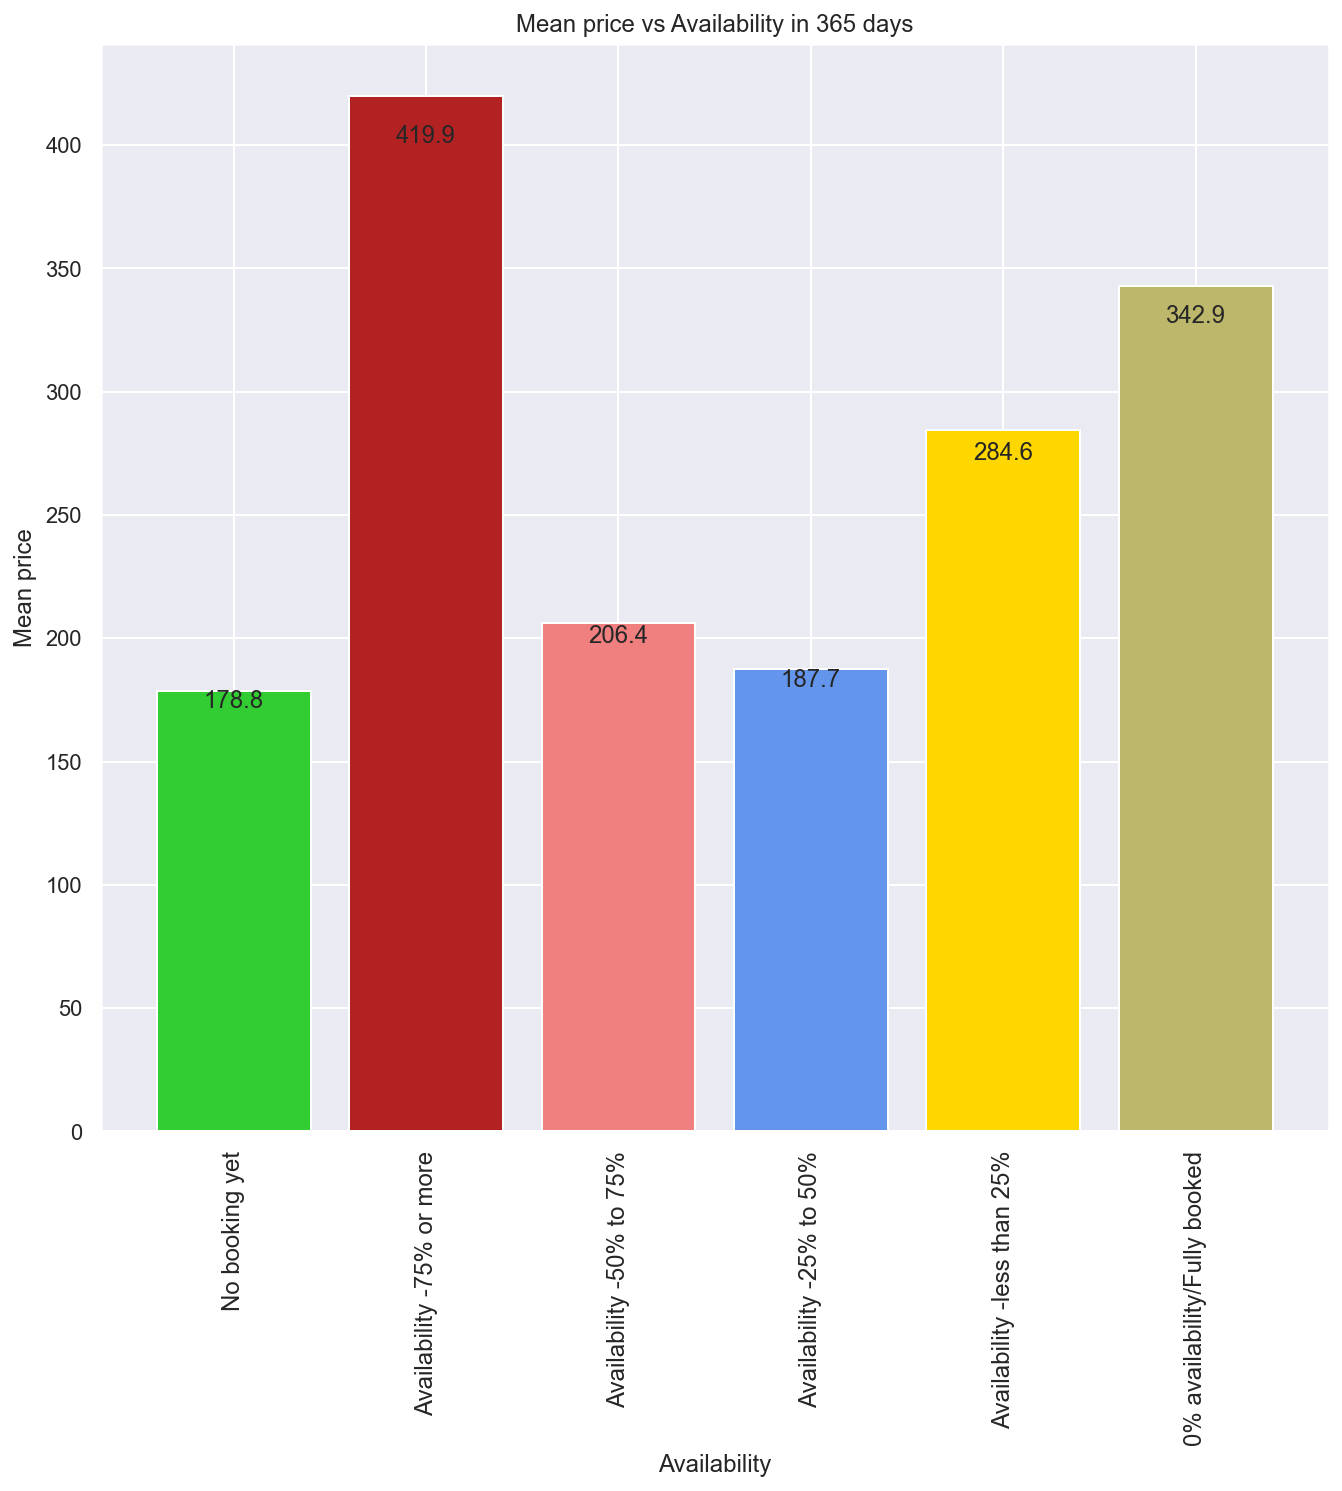

In [34]:
t=data.groupby('Booking_level',as_index=False)['mean_price'].mean()
t['mean_price']=round(t['mean_price'],1)
t=t.reindex([5,3,2,1,4,0])
colors=['limegreen','firebrick','lightcoral','cornflowerblue','gold','darkkhaki']
fig, ax = plt.subplots()
bar_x = [0,1,2,3,4,5]
bar_height = t['mean_price'].values.tolist()
bar_tick_label = t['Booking_level'].values.tolist()
bar_label = t['mean_price'].values.tolist()
bar_plot = ax.bar(x='Booking_level',height='mean_price',data=t,color=colors)

def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.95*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0)
autolabel(bar_plot)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(t['Booking_level'].values.tolist(),rotation=90,fontsize='medium')
ax.set_title("Mean price vs Availability in 365 days")
ax.set_xlabel('Availability')
ax.set_ylabel('Mean price')

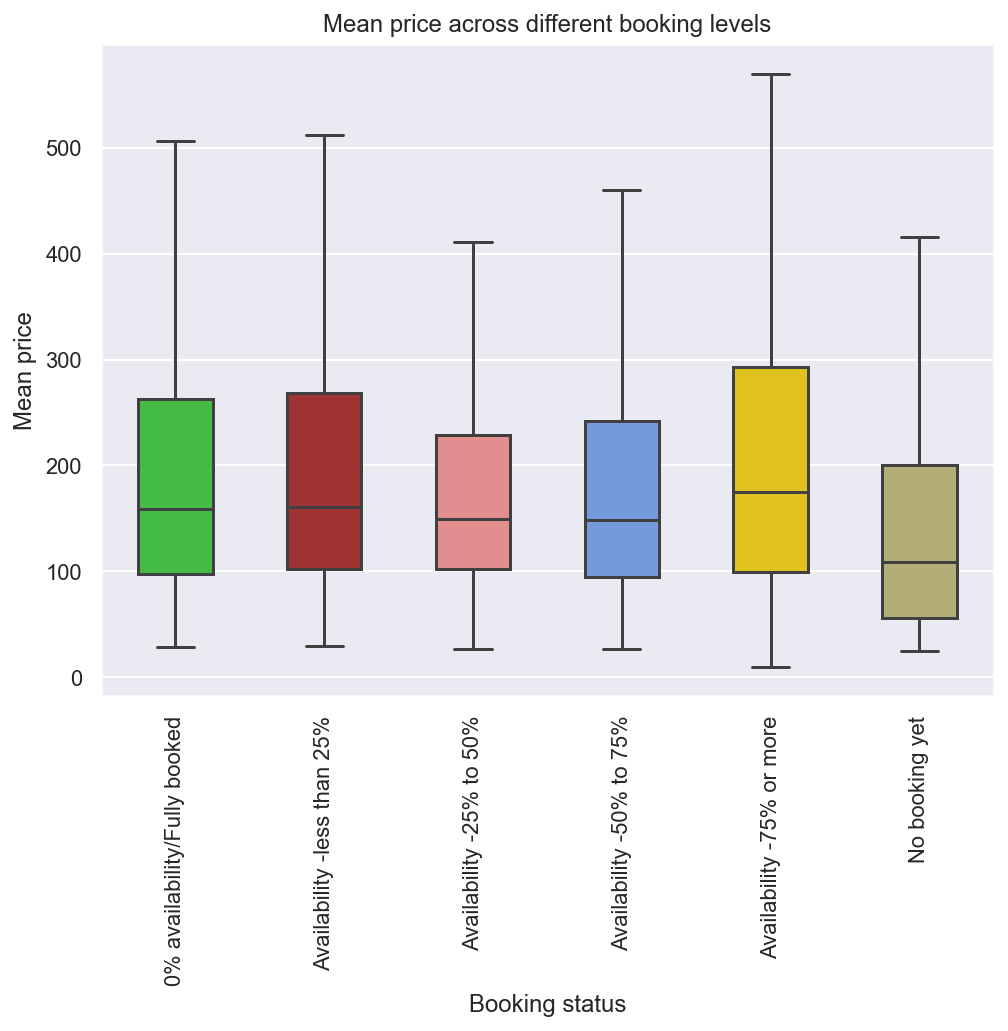

In [35]:
colors=['limegreen','firebrick','lightcoral','cornflowerblue','gold','darkkhaki']
sort=['0% availability/Fully booked','Availability -less than 25%','Availability -25% to 50%','Availability -50% to 75%','Availability -75% or more','No booking yet']
#palette='colorblind'
plt.figure(figsize=(8,6))
boxplot=sns.boxplot(y='mean_price',x='Booking_level',data=data,width=0.5,palette=colors,showfliers=False,
                   order=sort)
boxplot.tick_params(axis='x',rotation=90)
boxplot.ticklabel_format(axis='y',style='plain', useOffset=False)
boxplot.set_title('Mean price across different booking levels')
boxplot.set_xlabel('Booking status')
boxplot.set_ylabel('Mean price')
plt.show()

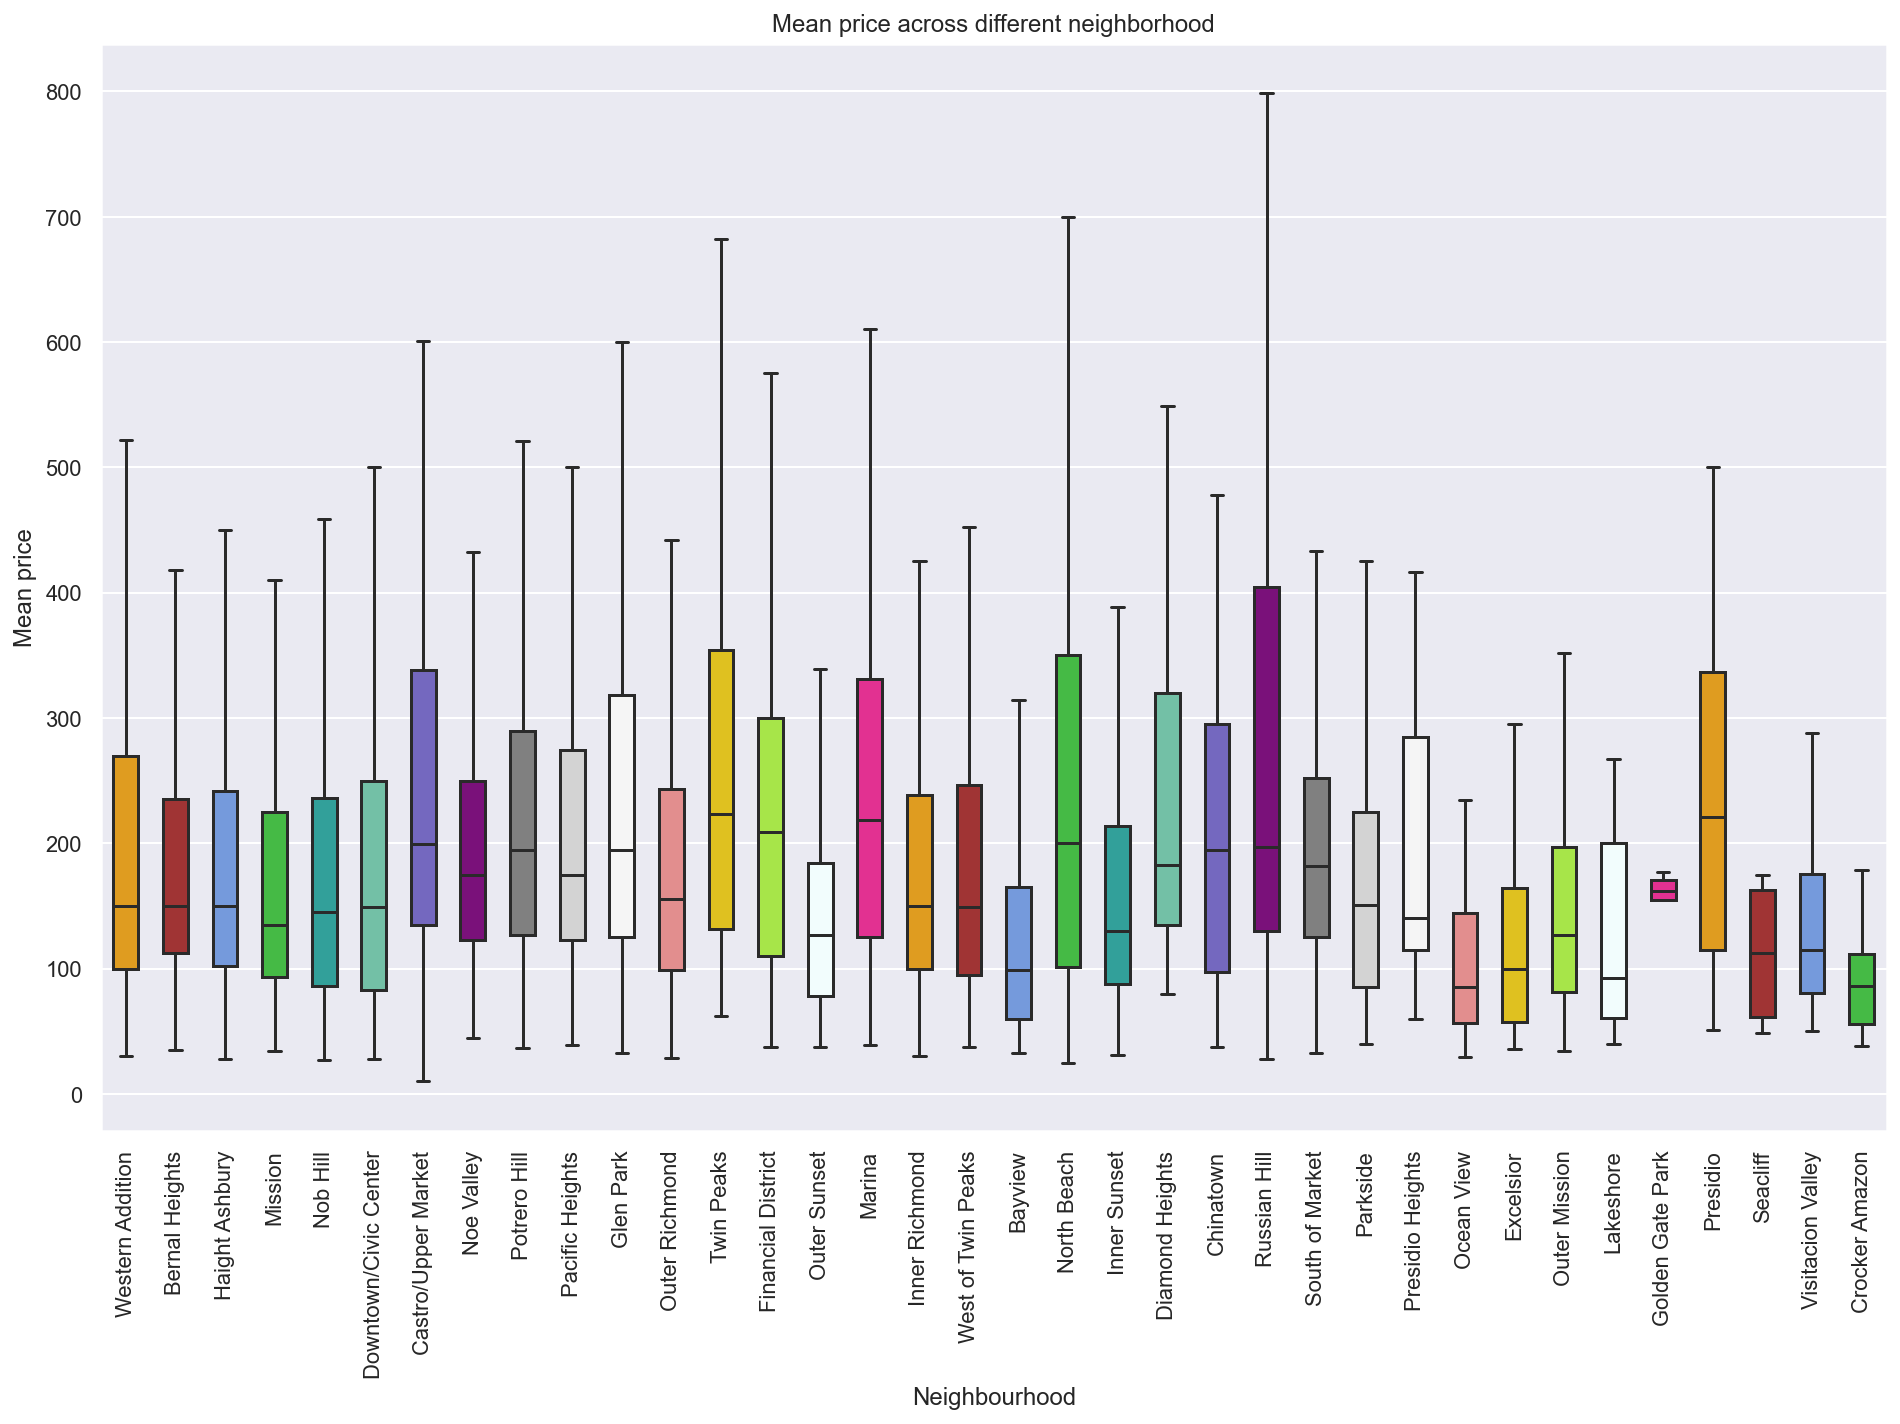

In [36]:
colors=['orange','firebrick','cornflowerblue','limegreen','lightseagreen','mediumaquamarine','slateblue','darkmagenta',
       'gray','lightgray','whitesmoke','lightcoral','gold','greenyellow','azure','deeppink']
#palette='colorblind'
plt.figure(figsize=(16,10))
boxplot=sns.boxplot(y='mean_price',x='neighbourhood_cleansed',data=data,width=0.5,palette=colors,showfliers=False)
boxplot.tick_params(axis='x',rotation=90)
boxplot.ticklabel_format(axis='y',style='plain', useOffset=False)
boxplot.set_title('Mean price across different neighborhood')
boxplot.set_xlabel('Neighbourhood')
boxplot.set_ylabel('Mean price')
plt.show()

   neighbourhood_cleansed  Successful
0                 Bayview         161
1          Bernal Heights         293
2     Castro/Upper Market         287
3               Chinatown         123
4          Crocker Amazon          33
5         Diamond Heights          12
6   Downtown/Civic Center         708
7               Excelsior         120
8      Financial District         173
9               Glen Park          58
10       Golden Gate Park           4
11         Haight Ashbury         301
12         Inner Richmond         172
13           Inner Sunset         148
14              Lakeshore          48
15                 Marina         186
16                Mission         533
17               Nob Hill         321
18             Noe Valley         230
19            North Beach         191
20             Ocean View          89
21          Outer Mission         107
22         Outer Richmond         146
23           Outer Sunset         255
24        Pacific Heights         141
25          

Text(0, 0.5, 'Number of listings')

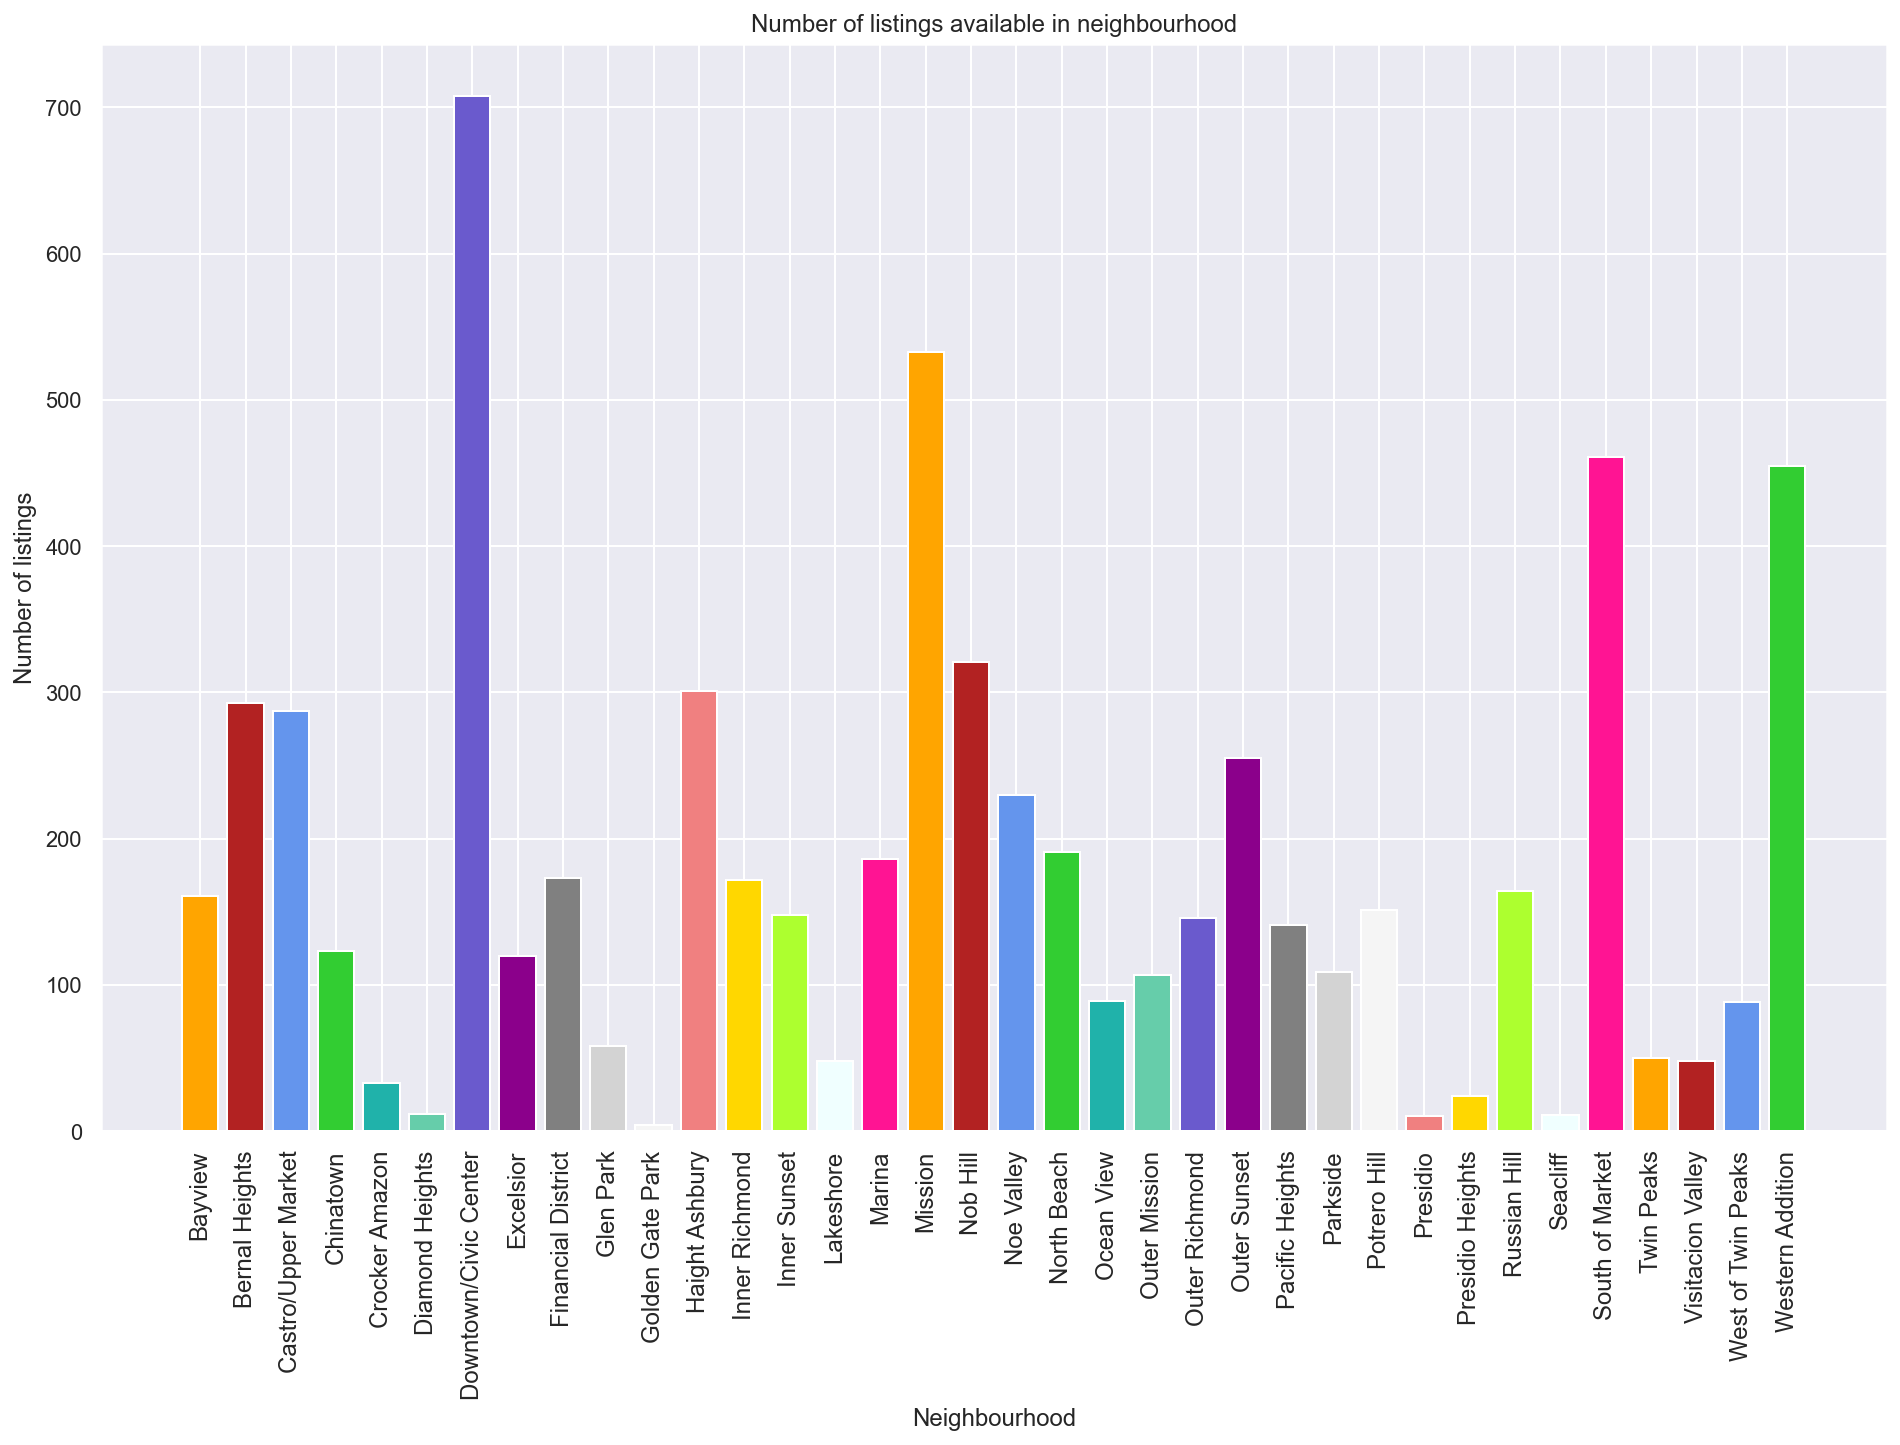

In [37]:
colors=['orange','firebrick','cornflowerblue','limegreen','lightseagreen','mediumaquamarine','slateblue','darkmagenta',
       'gray','lightgray','whitesmoke','lightcoral','gold','greenyellow','azure','deeppink']

t=data.groupby('neighbourhood_cleansed',as_index=False)['Successful'].count()
print(t)
fig=plt.figure(figsize=(16,10))
ax=fig.add_subplot(1,1,1)
ax.bar(x='neighbourhood_cleansed',height='Successful',data=t,color=colors)
ax.set_xticks(np.arange(0,36,1))
ax.set_xticklabels(t['neighbourhood_cleansed'].values.tolist(),rotation=90,fontsize='medium')
ax.set_title("Number of listings available in neighbourhood")
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Number of listings')


Text(0, 0.5, 'Avg Review score rating')

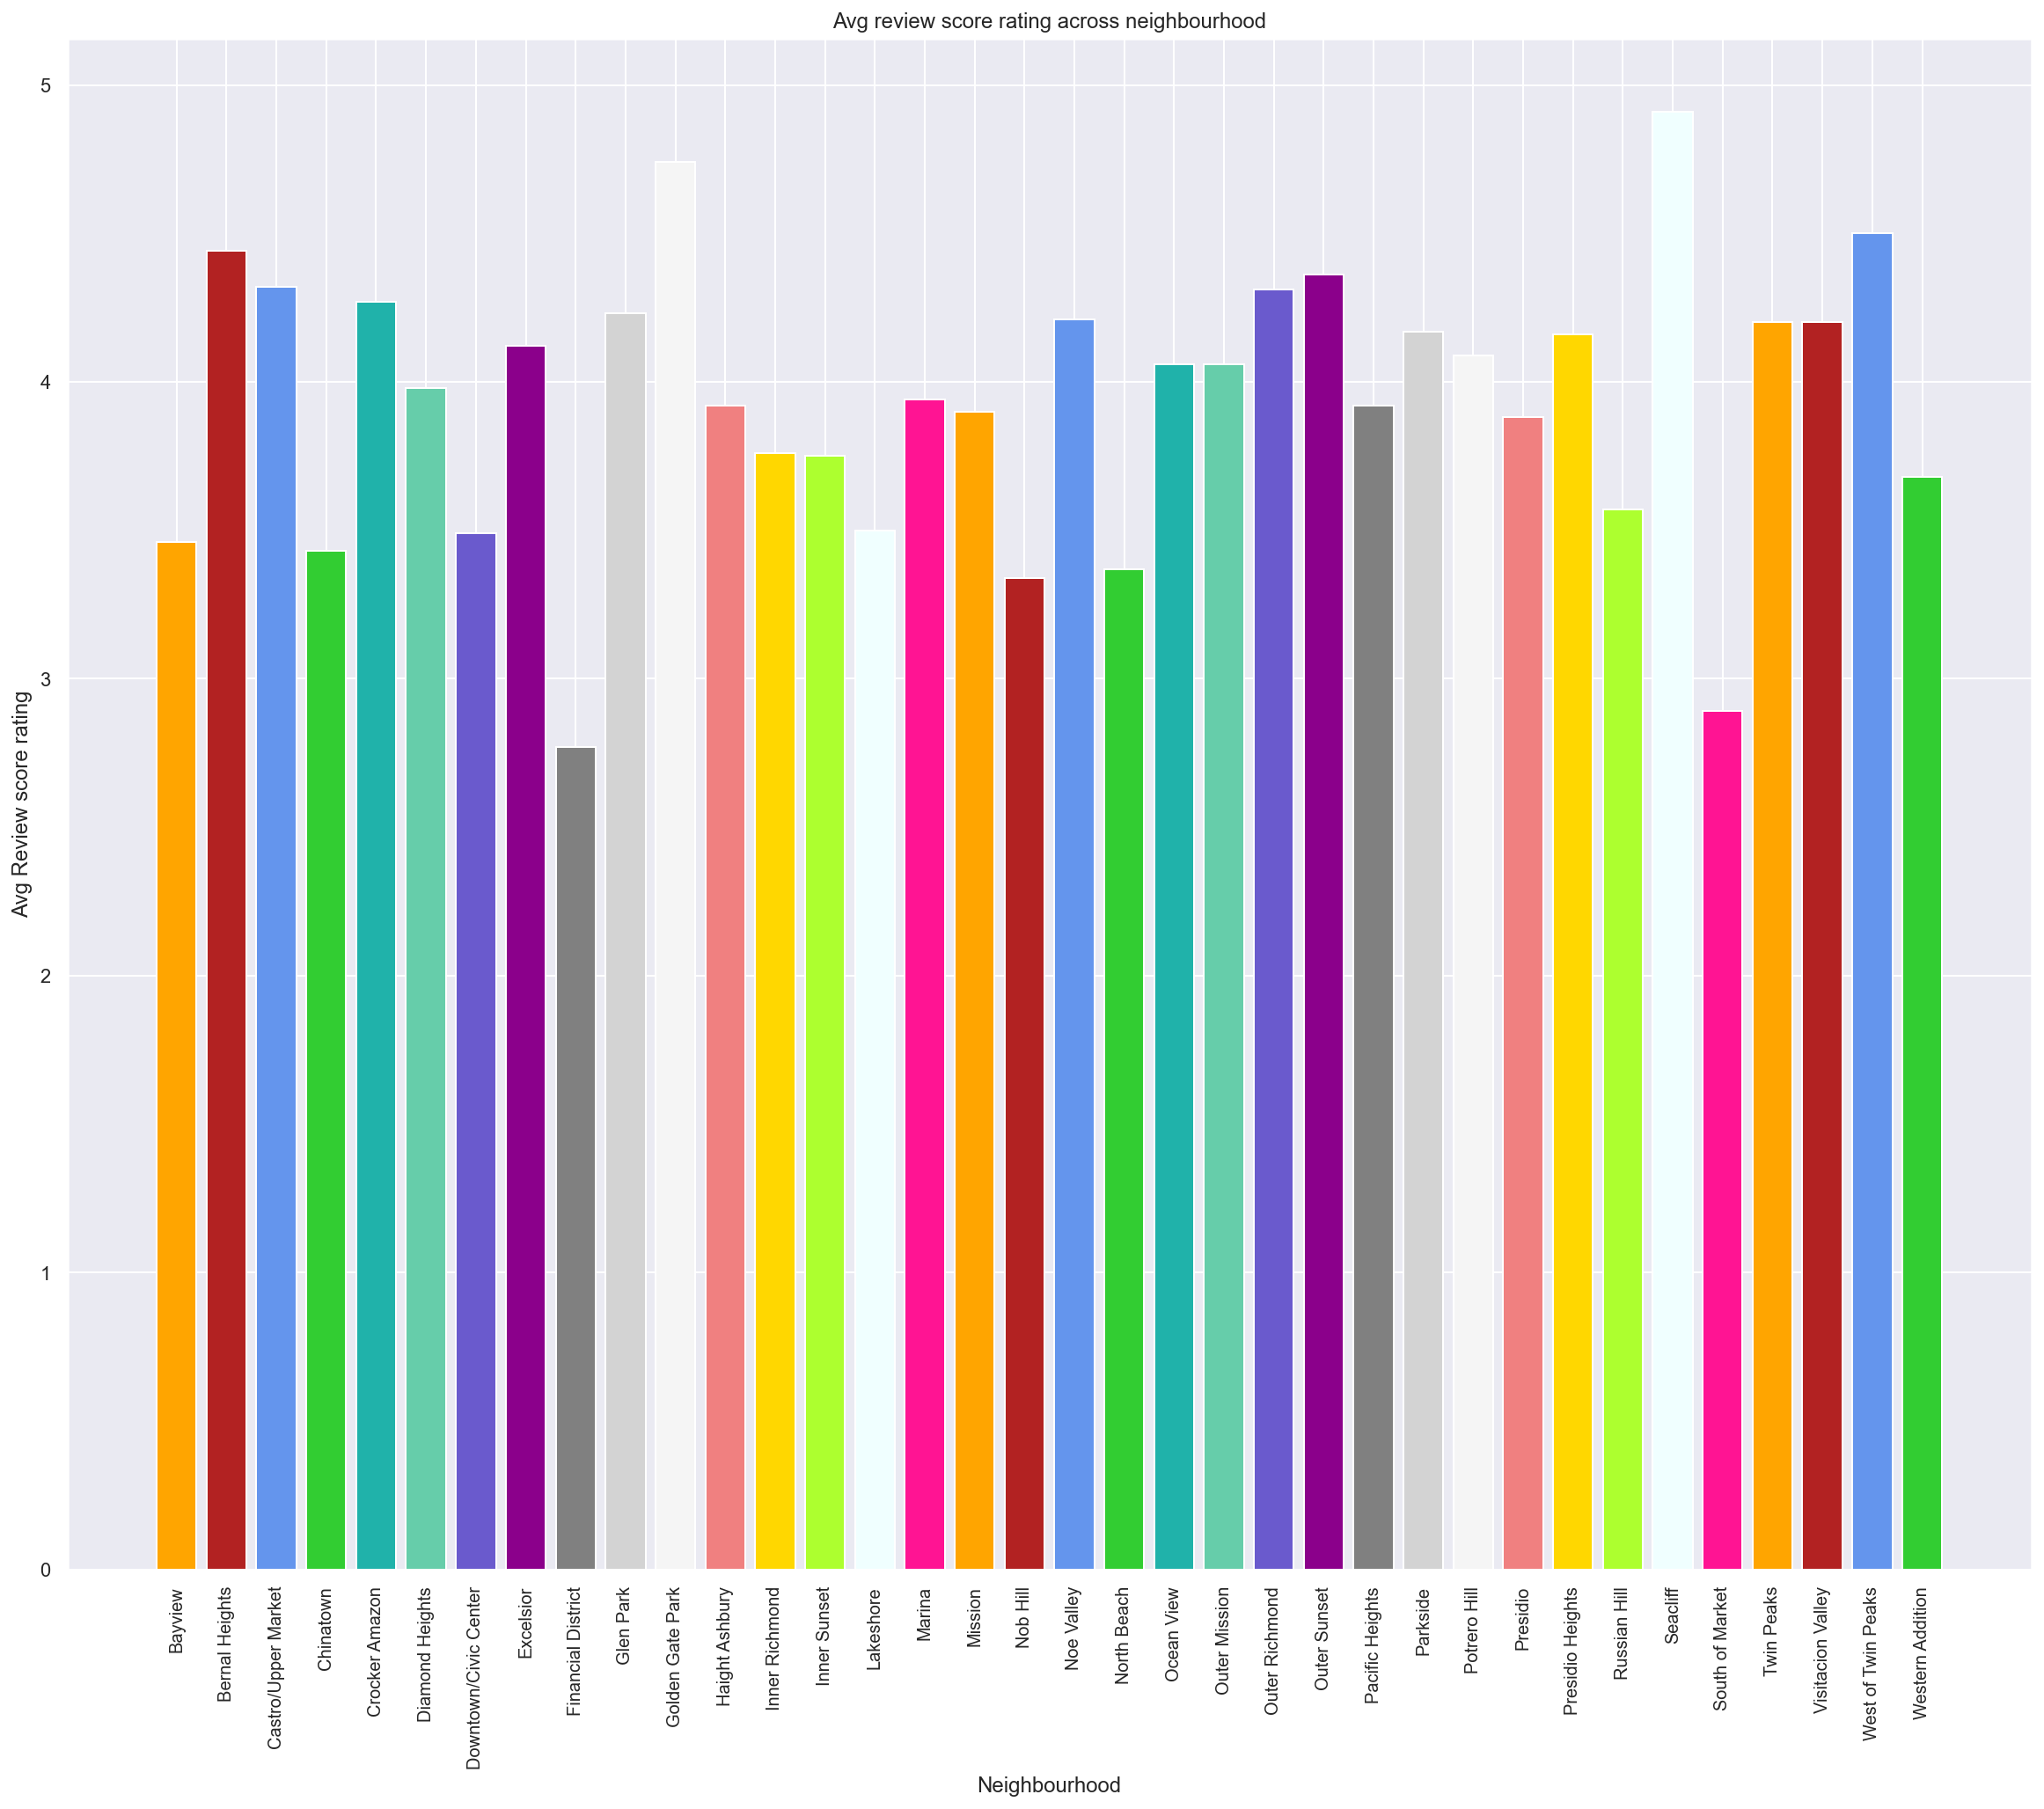

In [39]:
t=data.groupby(['neighbourhood_cleansed'],as_index=False)['review_scores_rating'].mean()
t['review_scores_rating']=round(t['review_scores_rating'],2)


fig=plt.figure(figsize=(20,16))
ax=fig.add_subplot(1,1,1)
bar_plot=ax.bar(x='neighbourhood_cleansed',height='review_scores_rating',data=t,color=colors)

ax.set_xticklabels(t['neighbourhood_cleansed'].values.tolist(),rotation=90,fontsize='small')
ax.set_title("Avg review score rating across neighbourhood")
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Avg Review score rating')

Text(0, 0.5, 'Review score rating')

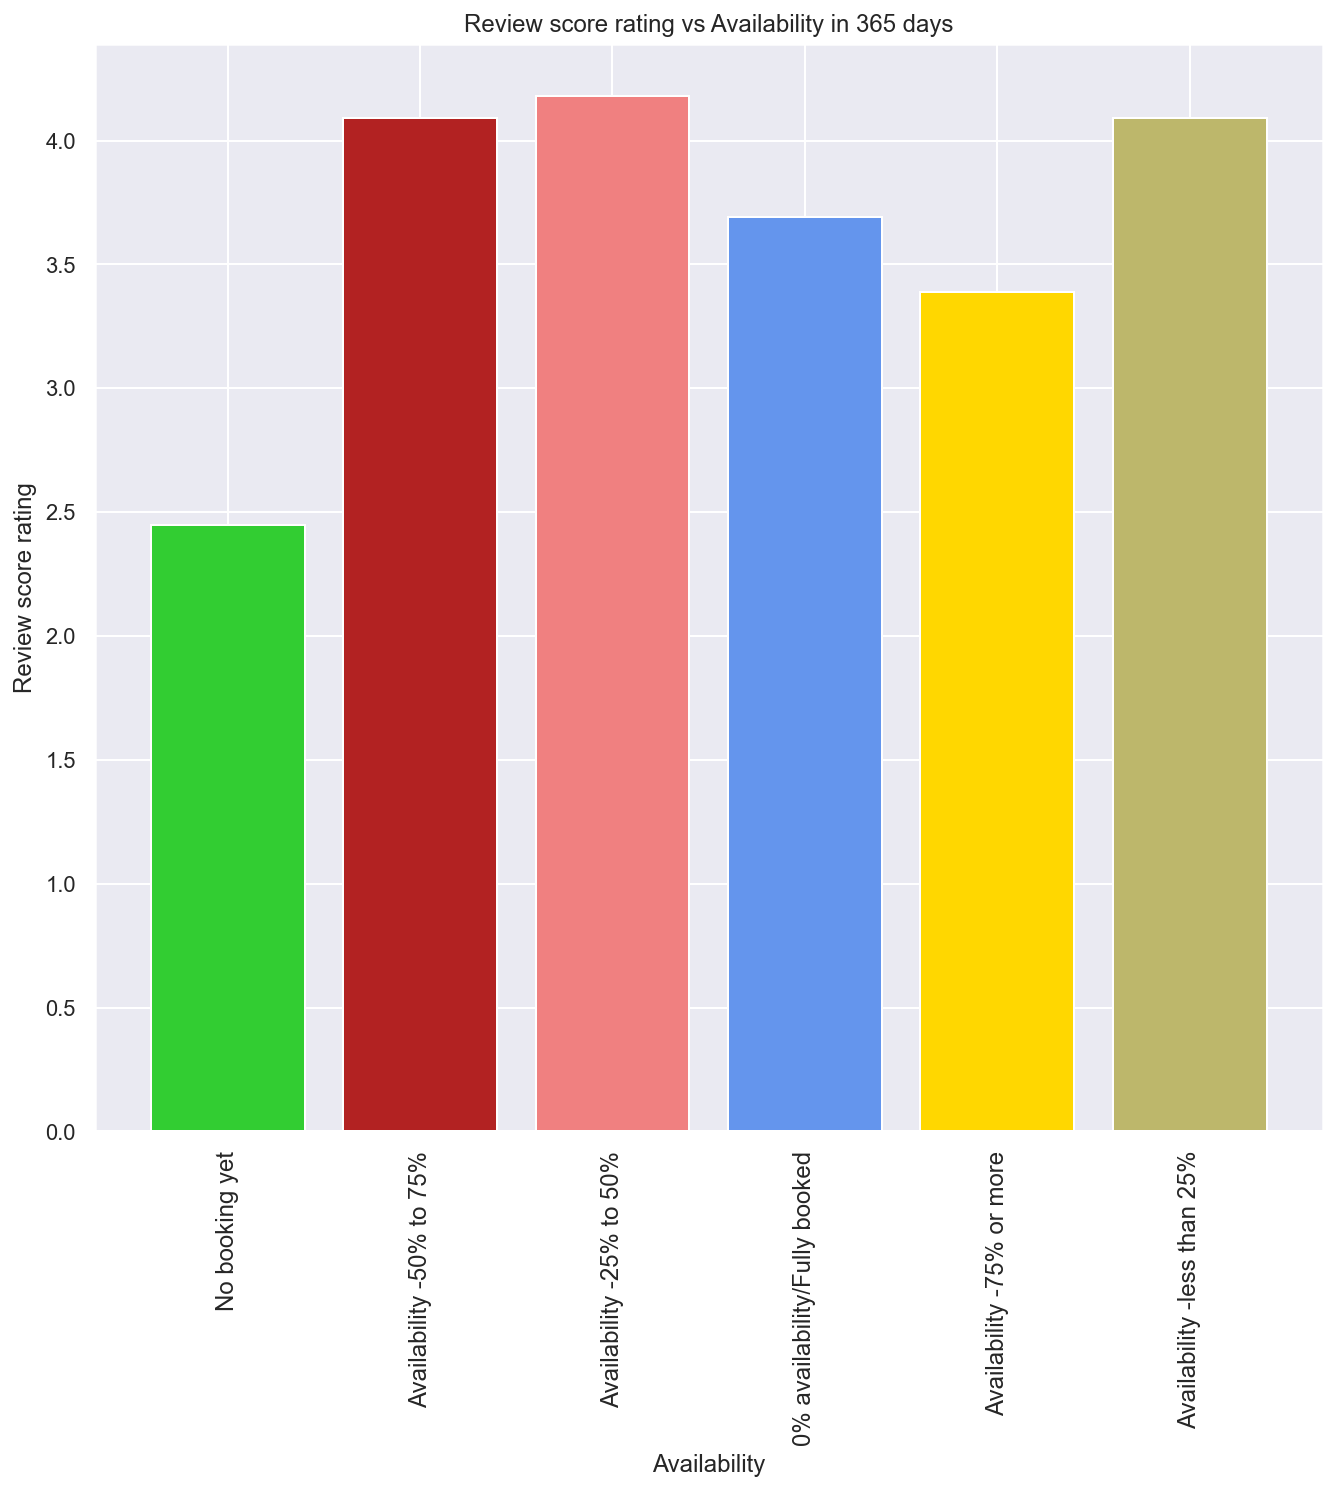

In [40]:
t=data.groupby('Booking_level',as_index=False)['review_scores_rating'].mean()
t['review_scores_rating']=round(t['review_scores_rating'],2)
t=t.reindex([5,2,1,0,3,4])
colors=['limegreen','firebrick','lightcoral','cornflowerblue','gold','darkkhaki']
fig, ax = plt.subplots()
bar_x = [0,1,2,3,4,5]
bar_height = t['review_scores_rating'].values.tolist()
bar_tick_label = t['Booking_level'].values.tolist()
bar_label = t['review_scores_rating'].values.tolist()
bar_plot = ax.bar(x='Booking_level',height='review_scores_rating',data=t,color=colors)


ax.set_xticklabels(t['Booking_level'].values.tolist(),rotation=90,fontsize='medium')
ax.set_title("Review score rating vs Availability in 365 days")
ax.set_xlabel('Availability')
ax.set_ylabel('Review score rating')